# ECE457A Assignment 2

**By: Logan Hartford**

**Due: 10/11/2024**

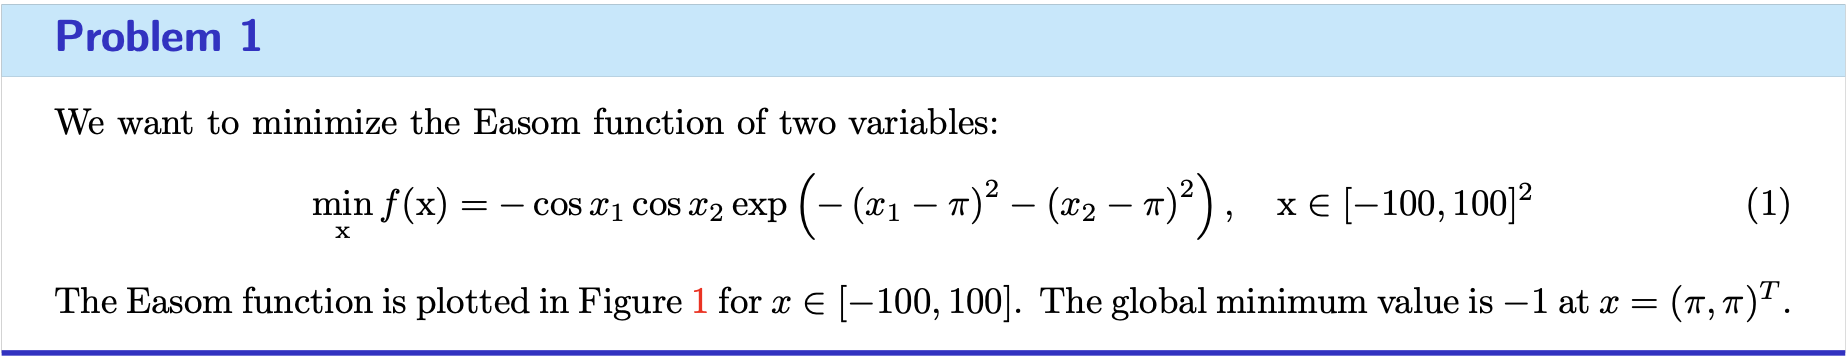

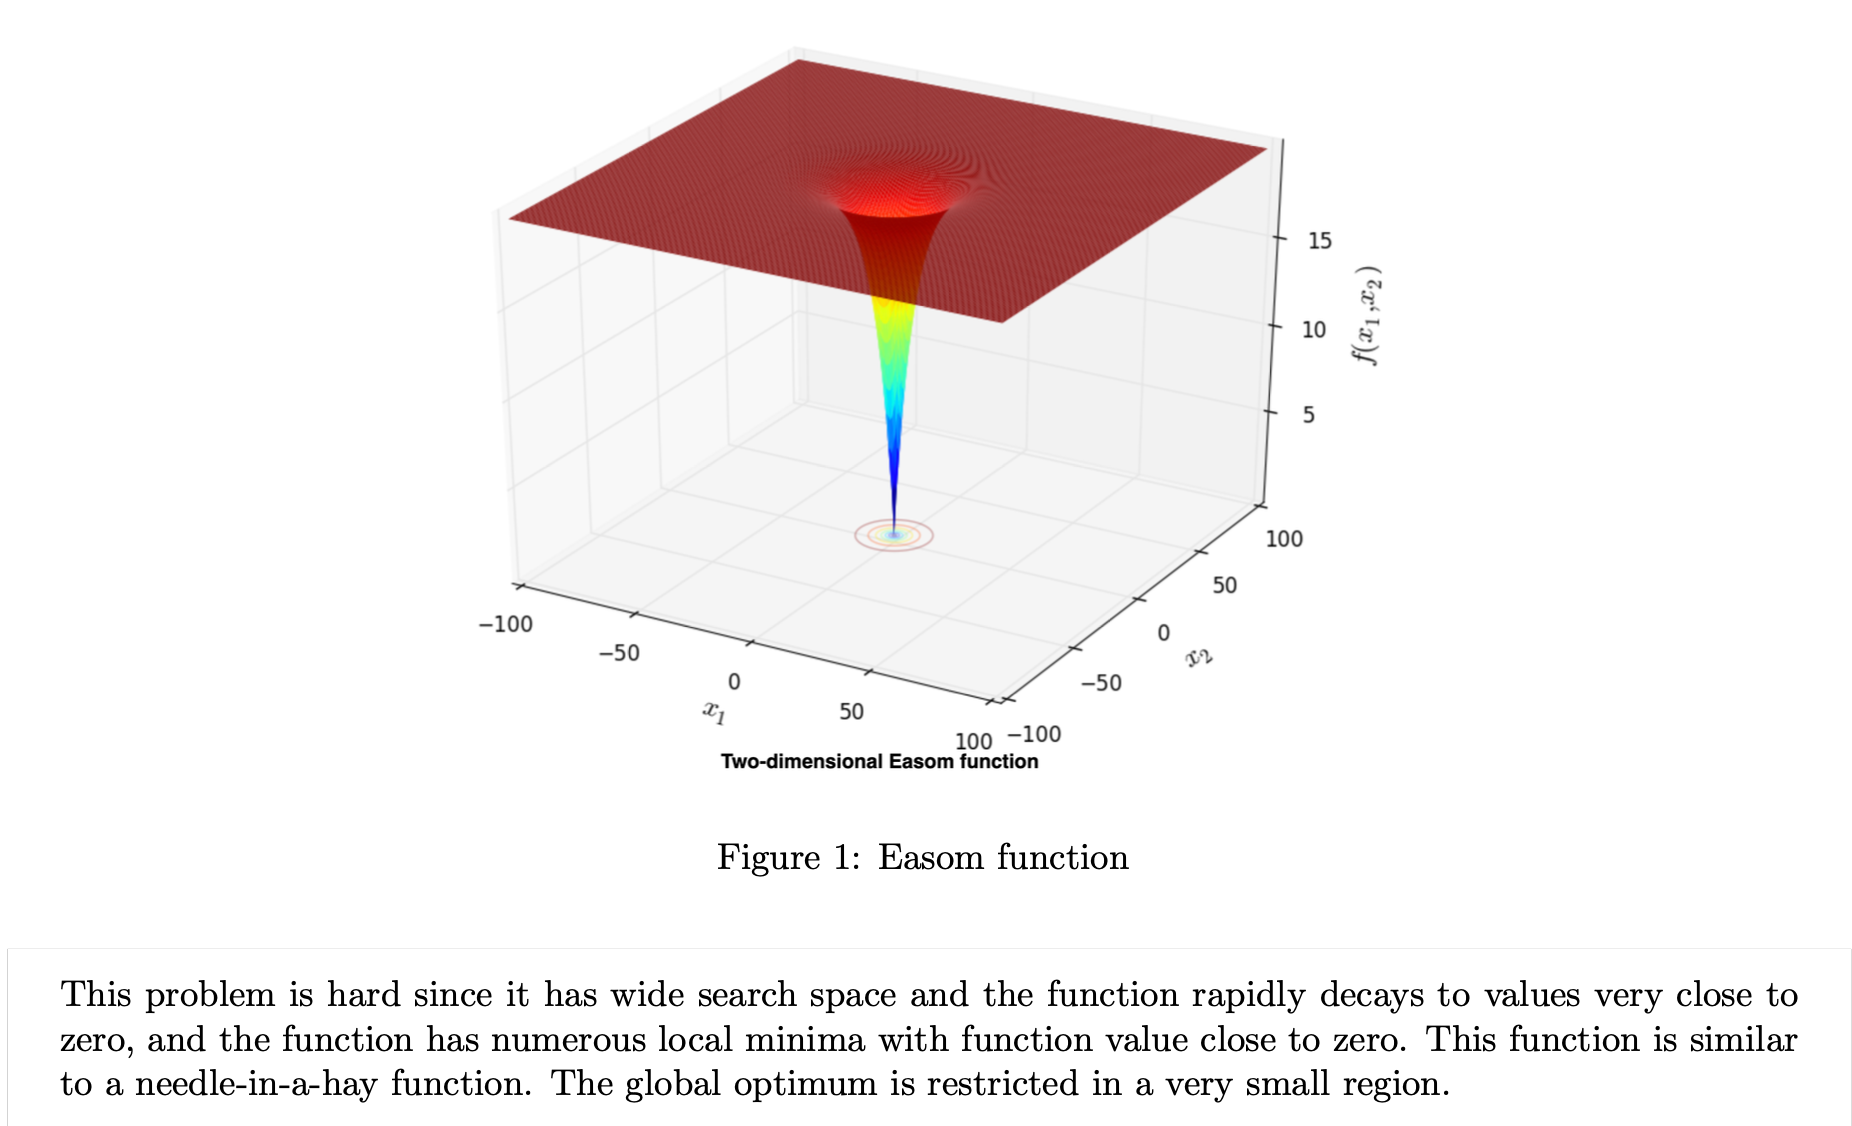

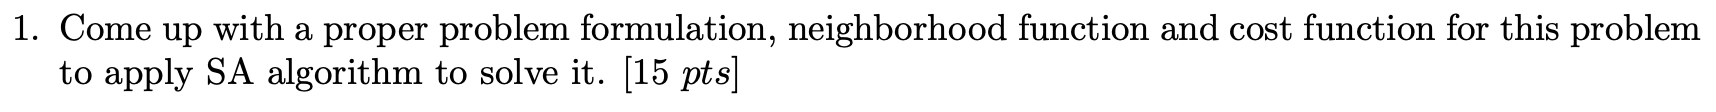

### 1.1 Problem Formulation

#### 1.1.1 Objective
- Minimize the Easom function.

#### 1.1.2 Search Space
- The search space consists of all possible pairs of input values within the given range. 
- This means any combination of two values between -100 and 100 is a potential solution.

#### 1.1.3 Initial Solution
- Start with a randomly chosen pair of input values within the search space.

#### 1.1.4 Neighboorhood Definition
- A neighboring solution is found by slightly altering the current pair of input values.
- This adjustment is done by adding a small random change to each input. 
- The amount of change should decrease gradually as the solution progresses.

#### 1.1.5 Acceptance Criteria
- Compare neighbooring solution with current solution.
- If the new solution is better, accept it.
- If it is worse, accpet it based on a probability that decreases as the algorithm proceeds.

#### 1.1.6 Cooling Schedule
- Gradually reduce the temperature parameter over time. 
- The temperature starts high, allowing more frequent acceptance of worse solutions to escape local minima.
- Then decreases progressivly to make the algorithm more selective as it converges to a minimum.

#### 1.1.7 Stopping Criteria
- The temperature becomes very low, or
- A maximum number of iterations is reached, or 
- There is no noticeable improvement in the function value over a set number of iterations.

#### 1.1.8 Evaluation and Output
- Track the best solution found throughout the optimization process.
- Evaluate the performance of the algorithm with different parameter settings.

#### 1.1.9 Neighborhood Function
- Generates new candidates by making small random changes to the current inputs.
- The small random changes are often taken from Guassian distribution with mean 0 or a uniform distribution.

#### 1.1.10 Cost Function
- The cost function evaluates the quality of a state.
- In this case, the only measure of quality it the value of the function at a state.
- The cost function is therefore, the function itself.

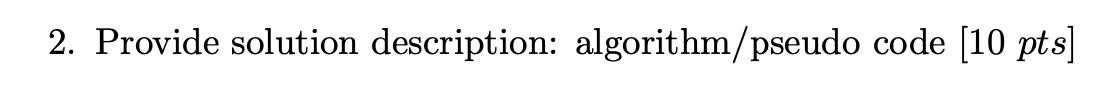

### 1.2 Pseudo Code

#### Algorithm: Simulated Annealing for Minimizing Easom Function

**Input:**  
Initial solution `(x1, x2)`, initial temperature `T`, cooling rate `alpha`,  
minimum temperature `Tmin`, maximum iterations `max_iter`

**Output:**  
Best solution found `(x1_best, x2_best)` and its function value `f_best`

1. Initialize `(x1_current, x2_current)` with a random point in `[-100, 100]^2`
2. Set `x1_best`, `x2_best` to `x1_current`, `x2_current`
3. Compute `f_current = Easom(x1_current, x2_current)`
4. Set `f_best = f_current`
5. While `T > Tmin`:
    
    a. For `i = 1` to `max_iter`:
        
    i.   Generate new potential solution `(x1_new, x2_new)` by adding a small random change  
            to `(x1_current, x2_current)`  
            - `x1_new = x1_current + random change`  
            - `x2_new = x2_current + random change`

    ii.  Compute `f_new = Easom(x1_new, x2_new)`

    iii. If `f_new < f_current`:
            - Accept the new solution  
            - Set `(x1_current, x2_current) = (x1_new, x2_new)`  
            - Set `f_current = f_new`  
            Else:
            - Accept the new solution with probability `P = exp(-(f_new - f_current) / T)`  
                (generate a random number between 0 and 1; if it is less than `P`, accept the solution)

    iv.  If `f_current < f_best`:
            - Update the best solution: `(x1_best, x2_best) = (x1_current, x2_current)`  
            - Set `f_best = f_current`

    b. Reduce the temperature: `T = alpha * T`

6. Return `(x1_best, x2_best)` and `f_best`


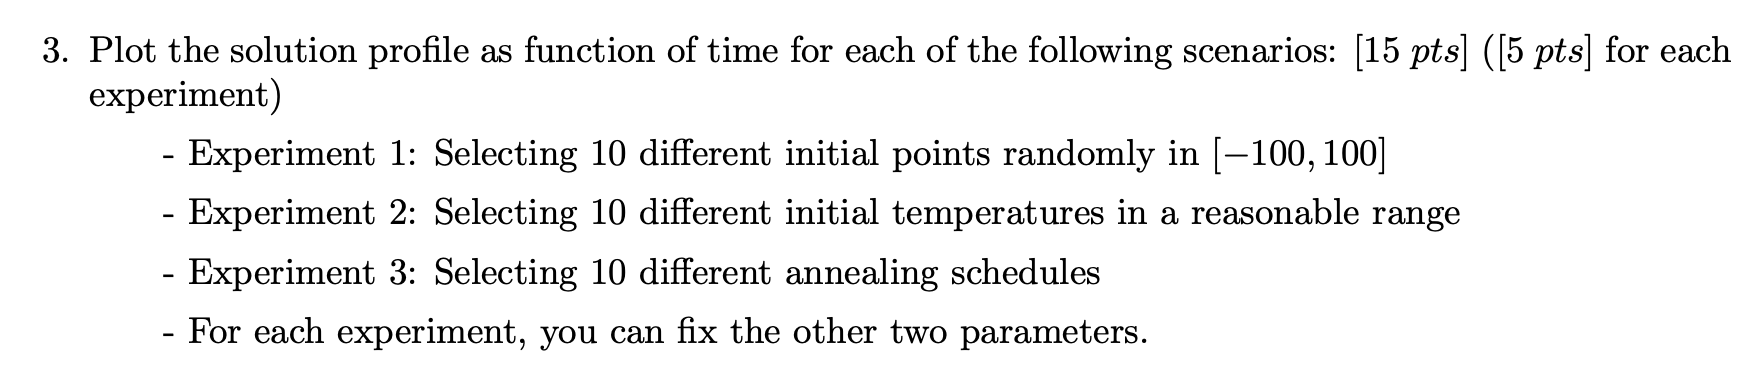

In [234]:
import numpy as np

def easom_function(x):
    """Easom function implementation."""
    x1, x2 = x
    return -np.cos(x1) * np.cos(x2) * np.exp(-((x1 - np.pi)**2 + (x2 - np.pi)**2))

In [239]:
# Validating easom_function
print(easom_function([np.pi, np.pi]))
print(easom_function([np.pi, np.pi + 0.1]))
print(easom_function([2, 2]))
print(easom_function([30, 30]))

-1.0
-0.9851037084132391
-0.012779642669914994
-0.0


In [292]:
def get_random_point(bounds):
    return np.array([np.random.uniform(low, high) for low, high in bounds])

def simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations, verbose=False):
    best_solution = x
    best_value = easom_function(x)
    current_temp = initial_temp
    solution_profile = []
    
    while current_temp > final_temp:
        for _ in range(max_iterations):
            # Generate a new solution
            new_x = x + np.random.uniform(-1, 1, size=len(bounds))
            # Clip to the bounds
            new_x = np.clip(new_x, [low for low, _ in bounds], [high for _, high in bounds])
            new_value = easom_function(new_x)
            
            delta = new_value - best_value
            # Acceptance criteria
            if delta < 0 or np.exp(-delta / current_temp) > np.random.rand():
                x = new_x
                best_value = new_value
                best_solution = new_x
            
            solution_profile.append(best_value)
        
        # Cool down
        current_temp *= alpha
    
    return best_solution, best_value, solution_profile

In [294]:
# Test the simulated_annealing function
bounds = [(-100, 100), (-100, 100)]
initial_temp = 10000
final_temp = 1e-8
alpha = 0.99
max_iterations = 150
x = get_random_point(bounds)

best_solution, best_value, _ = simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations)
print(f"x = {best_solution}")
print(f"f(x) = {best_value}")

x = [3.1421298 3.1417247]
f(x) = -0.9999995410510655


Experiment 1: Different initial points


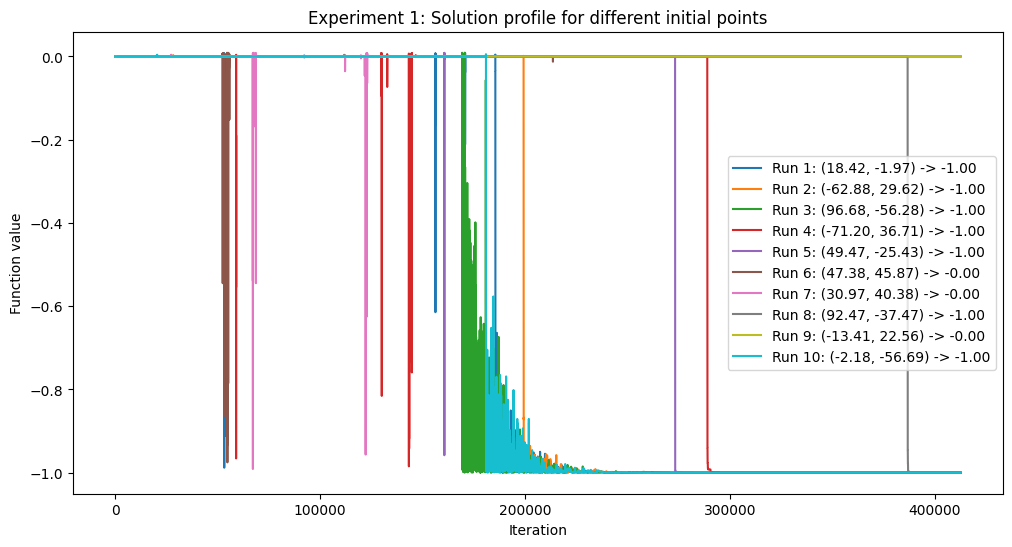

In [299]:
import matplotlib.pyplot as plt

print("Experiment 1: Different initial points")

# Fixed parameters
bounds = [(-100, 100), (-100, 100)]
initial_temp = 10000
final_temp = 1e-8
alpha = 0.99
max_iterations = 150
plt.figure(figsize=(12, 6))

# Experiment parameters
random_points = [get_random_point(bounds) for _ in range(10)]

for i in range(10):
    x = random_points[i]
    best_solution, best_value, profile = simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations)
    plt.plot(profile, label=f"Run {i+1}: ({x[0]:.2f}, {x[1]:.2f}) -> {best_value:.2f}")
plt.title("Experiment 1: Solution profile for different initial points")
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.legend()
plt.show()

Experiment 2: Different initial temperatures


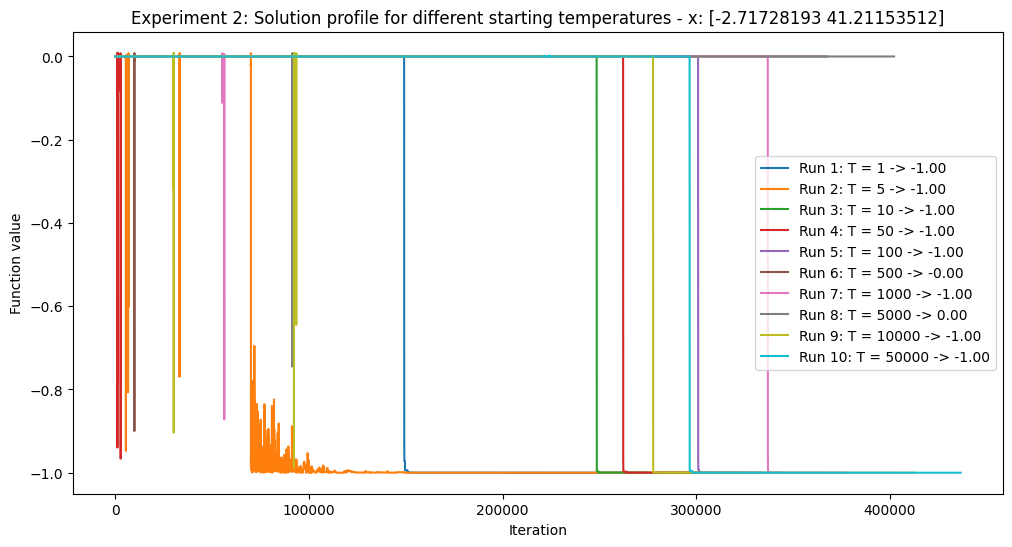

In [304]:
print("Experiment 2: Different initial temperatures")

# Fixed parameters
bounds = [(-100, 100), (-100, 100)]
final_temp = 1e-8
alpha = 0.99
max_iterations = 150
plt.figure(figsize=(12, 6))
x = get_random_point(bounds)

# Experiment parameters
temperatures = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]

for i in range(10):
    initial_temp = temperatures[i]
    best_solution, best_value, profile = simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations)
    plt.plot(profile, label=f"Run {i+1}: T = {initial_temp} -> {best_value:.2f}")
plt.title(f"Experiment 2: Solution profile for different starting temperatures - x: {x}")
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.legend()
plt.show()

Experiment 3: Different annealing schedules


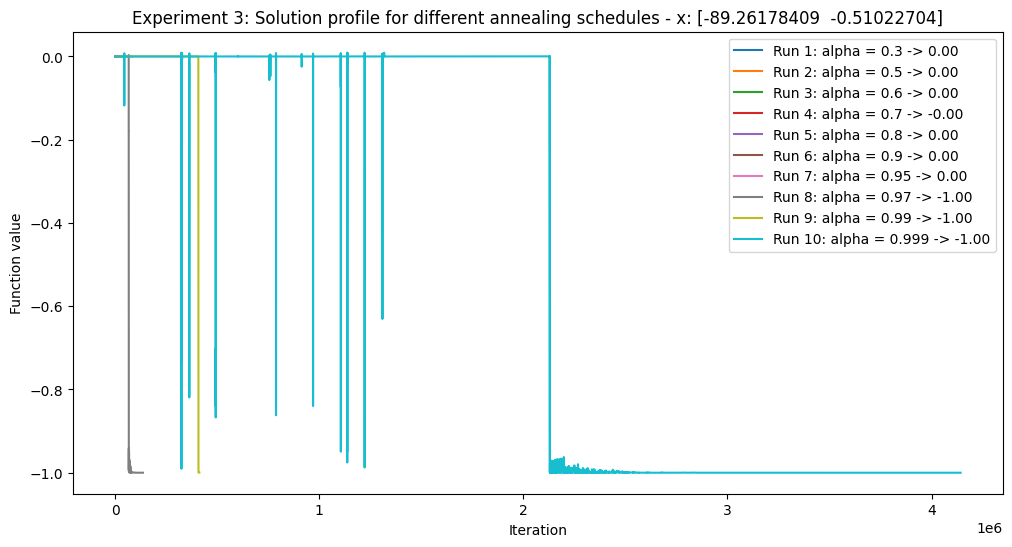

In [306]:
print("Experiment 3: Different annealing schedules")

# Fixed parameters
bounds = [(-100, 100), (-100, 100)]
initial_temp = 10000
final_temp = 1e-8
max_iterations = 150
plt.figure(figsize=(12, 6))
x = get_random_point(bounds)

# Experiment parameters
alphas = [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.99, 0.999]

for i in range(10):
    alpha = alphas[i]
    best_solution, best_value, profile = simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations)
    plt.plot(profile, label=f"Run {i+1}: alpha = {alpha} -> {best_value:.2f}")
plt.title(f"Experiment 3: Solution profile for different annealing schedules - x: {x}")
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.legend()
plt.show()

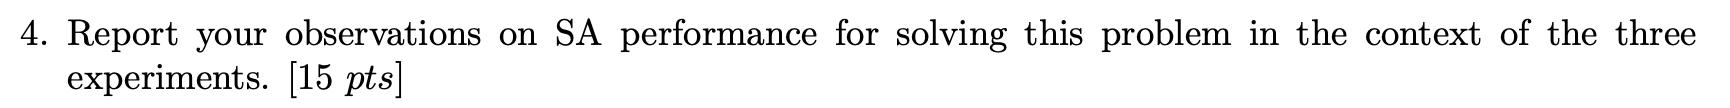

### 1.4 Observations on SA Performance

#### 1.4.1 Experiment 1: Different Initial Points
##### Observation
- The algorithm's performance was highly variable depending on the starting point.
- Runs starting closer to the global minimum at f(x) = -1 were more likely to converge successfully

##### Explanation
- The Easom function has a narrow global minimum surrounded by nearly flat areas. 
- Starting far from the optimal region often led to the algorithm getting stuck in local minima.

#### 1.4.2 Experiment 2: Different Initial Temperatures
##### Observation
- Higher initial temperatures generally improved the likelihood of finding the global minimum.
- Lower temperatures led to rapid convergence to local minima without much exploration.

##### Explanation
- Higher temperatures enable the acceptance of worse solutions in the early stages, allowing the algorithm to escape local minima. 
- Lower temperatures limit exploration and result in premature convergence.

#### 1.4.3 Experiment 3: Different Annealing Schedules
##### Observation
- Slower cooling rates (values closer to 1) performed better, with more runs reaching the global minimum.
- Faster cooling schedules resulted in quick convergence to local minima.

##### Explanation
- Slower cooling allows more iterations at higher temperatures, giving the algorithm time to explore the search space before settling into a local minimum.
- Faster cooling reduces this exploration phase, leading to less effective optimization.

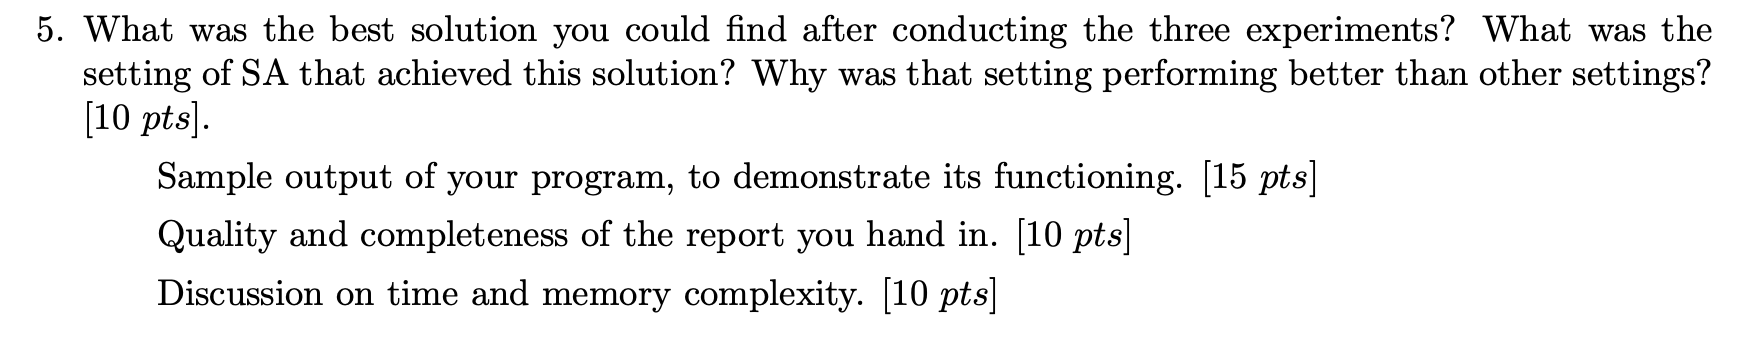

### 1.5 Best Solution and Settings

#### 1.5.1 Best Solution
- The best solution found was f(x) = -1 at x = (pi, pi), which is the known global minimum of the Easom function.

#### 1.5.2 Settings That Achieved This Solution
- Initial Temperature: 10,000
- Cooling Rate (Alpha): 0.99
- Maximum Iterations per Temperature: 150
- Starting Point: Randomly chosen within the bounds [-100, 100]

#### 1.5.3 Explanation
- Higher Initial Temperature: The high temperature allowed for better exploration of the search space early in the optimization process, making it more likely to escape local minima.
- Slower Cooling Rate: With a cooling rate of 0.99, the temperature decreased gradually, giving the algorithm more time at higher temperatures to explore different regions of the search space before converging.
- Sufficient Iterations per Temperature: Having 150 iterations at each temperature level ensured that enough candidate solutions were evaluated, increasing the chances of finding the global minimum.

#### 1.5.4 Discussion on Time and Memory Complexity

**Time Complexity:** 
- The time complexity depends on the number of temperature steps and iterations per temperature. 
- With approximately log_alpha(final_temp / initial_temp) temperature steps and 150 iterations per step, the overall complexity is roughly O(N * M), where N is the number of temperature steps and M is the number of iterations.

**Memory Complexity:**
- The memory usage is minimal, as it only stores the current solution, the best solution, and a list of function values for plotting.

#### 1.5.5 Sample Output

In [314]:
# Generate sample output
bounds = [(-100, 100), (-100, 100)]
initial_temp = 10000
final_temp = 1e-8
alpha = 0.99
max_iterations = 150
x = get_random_point(bounds)

best_solution, best_value, solution_profile = simulated_annealing(x, bounds, initial_temp, final_temp, alpha, max_iterations)

print(f"Initial solution: {x}")
print("10 evenly spaced values from the solution profile:")
print(solution_profile[::len(solution_profile)//10])
print(f"Best solution: {best_solution}")

Initial solution: [49.14898346 44.91220762]
10 evenly spaced values from the solution profile:
[0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.9992364599489767, -0.999972927723647, -0.9999997716865248, -0.9999997716865248]
Best solution: [3.14137228 3.14127072]


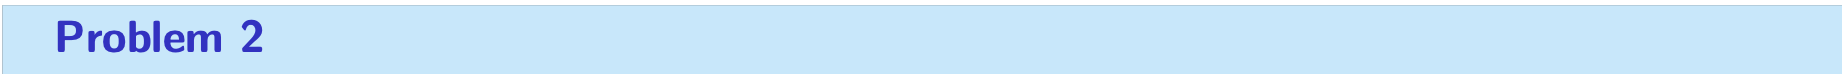

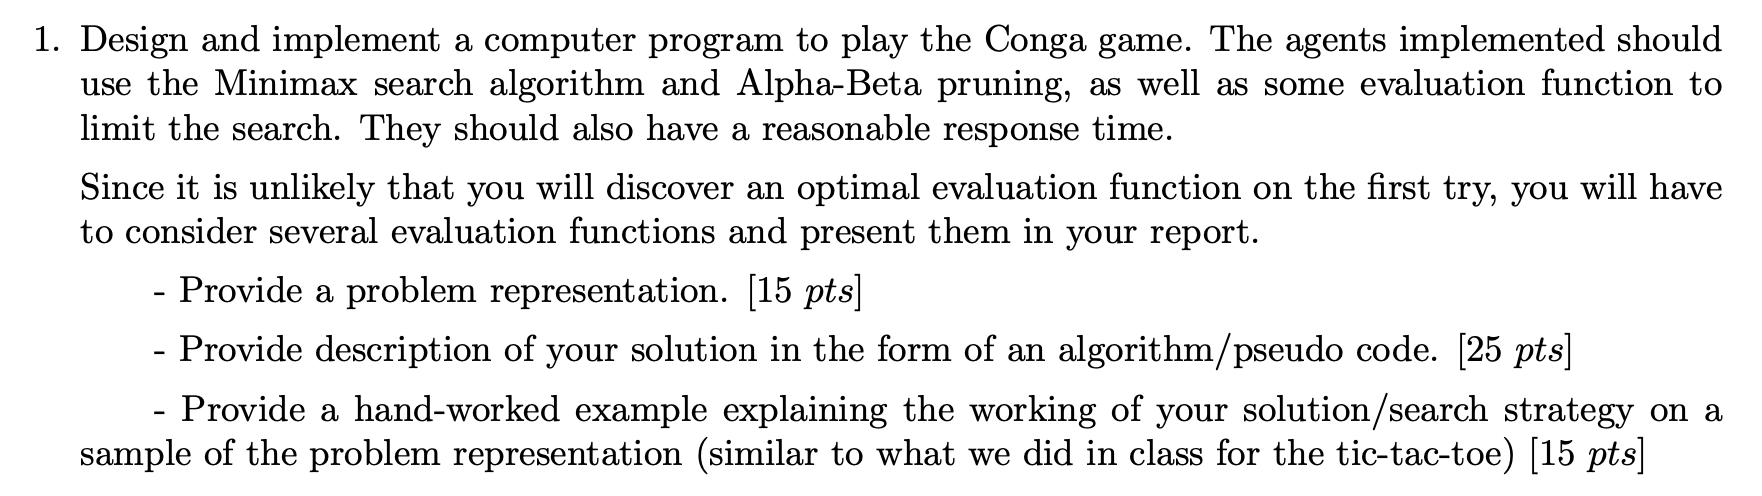

### 2.1 Problem Representation

#### 2.1.1 Objective
- Develop an agent that can play the Conga game rationally, aiming to block the opponent's stones so they have no legal moves.

#### 2.1.2 Search Space
- The search space consists of all possible valid game states.
- Each state is defined by the positions of the stones for both players on a 4x4 board.

#### 2.1.3 Initial Solution
- Player 1 has ten black stones in (1,4), and Player 2 has ten white stones in (4,1).

#### 2.1.4 Neighborhood Definition
- The neighboring states are defined by all possible valid moves for the current player.
- A valid move involves moving stones from one square to one or more adjacent squares, according to the game rules.

#### 2.1.5 Move Evaluation
- Use a Minmax algorithm with Alpha-Beta pruning to evaluate the potential outcomes of moves.
- The evaluation function estimates the quality of a game state for the current player.
- Possible evaluation criteria could include the number of stones in advantageous positions or the number of blocked opponent stones.

#### 2.1.6 Search Strategy
- Use a depth-limited Minmax search with Alpha-Beta pruning to explore possible game states.
- At each turn, select the move that maximizes the minimum score obtainable by the opponent.

#### 2.1.7 Stopping Criteria
- The game ends when one player has no legal moves left.

#### 2.1.8 Evaluation and Output
- Output the chosen move, the evaluation score of the move, and the number of nodes explored during the search.
- Measure the agent's performance by playing multiple games against a Random Agent.

### 2.1 Pseudo Code

#### Function Definitions
1. **Minmax(state, depth, alpha, beta, maximizingPlayer):**
    - **Input:**
        - `state`: Current board configuration.
        - `depth`: Current search depth.
        - `alpha`: The best score that the maximizing player can guarantee so far.
        - `beta`: The best score that the minimizing player can guarantee so far.
        - `maximizingPlayer`: Boolean indicating if the current player is the maximizing player.
    - **Output:**
        - The evaluation score for the current state.

    - **Base Case:**
        - If `depth` is 0 or the game is over (no legal moves for either player), return the evaluation of `state`.

    - **If maximizingPlayer is true:**
        - Set `maxEval = -∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minmax(newState, depth - 1, alpha, beta, false)`
            - `maxEval = max(maxEval, eval)`
            - `alpha = max(alpha, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `maxEval`

    - **Else (minimizingPlayer is true):**
        - Set `minEval = ∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minmax(newState, depth - 1, alpha, beta, true)`
            - `minEval = min(minEval, eval)`
            - `beta = min(beta, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `minEval`

2. **EvaluationFunction(state):**
    - Calculate a score for the given `state`.
    - Some things to try:
        - The number of legal moves available for the opponent.
        - The number of postions controlled by the agent minus the positions controlled by the opponent.
        - Difference is largest concentration of stones between the two players.
        - The total number of squares available for captures across valid moves.
        - Number of stones with valid moves.
    - Return the calculated score.

3. **GenerateLegalMoves(state, player):**
    - Given the current `state` and the `player`, generate a list of all valid moves according to the game rules.
    - Return the list of moves.

#### Main Algorithm

1. **Initialize:**
    - `currentState = initial board configuration`
    - `player = maximizingPlayer (e.g., Player 1)`

2. **Game Loop:**
    - While the game is not over (current player has valid moves):
        - If `player` is the maximizing player:
            - Set `bestMove = None`
            - Set `bestValue = -∞`
            - For each move in `GenerateLegalMoves(currentState, player)`:
                - Apply the move to generate `newState`.
                - `moveValue = Minmax(newState, searchDepth, -∞, ∞, false)`
                - If `moveValue > bestValue`:
                    - `bestValue = moveValue`
                    - `bestMove = move`
            - Update `currentState` with `bestMove`.
        - Else (minimizing player):
            - Follow the same procedure, but minimize the `moveValue`.

        - Switch `player` to the other player.
    
3. **End of Game:**
    - Output the result of the game (winner, final board configuration, number of turns taken).


### 2.1 Hand Worked Example

#### Initial Conditions
- Player1 is Maximizing player.
- Player1 starts.
- Depth = 2
- Start of game.

#### Evaluation Function
- Number of valid moves for Player1, minus number of valid moves for Player2

#### MinMax Tree
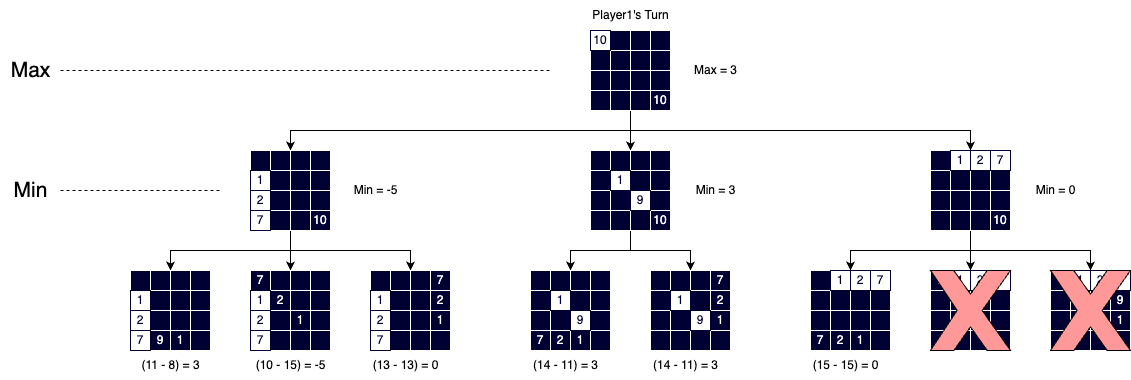

- In this case Player1's first move would be to move diagonally.
- The two right most nodes are never explored becasue they are pruned.

### 2.1 Building out The Game

In [6]:
# Creating the game board
def create_board():
    return np.array([
        [10, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, -10],
        ])

board = create_board()
print(board)

[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]


In [172]:
def location_valid(board, row, col, player):
    return (0 <= row < 4 and 0 <= col < 4) and (board[row, col] * player >= 0)

def generate_moves(board, player):
    moves = []
    directions = [
        (-1, 0),  # up
        (1, 0),   # down
        (0, -1),  # left
        (0, 1),   # right
        (-1, -1), # up-left
        (-1, 1),  # up-right
        (1, -1),  # down-left
        (1, 1)    # down-right
    ]

    # Iterate through the board to find the player's stones
    for row in range(4):
        for col in range(4):
            # If stone belongs to player
            if board[row, col] * player > 0:
                for direction in directions:
                    new_row, new_col = row + direction[0], col + direction[1]

                    # Check if the move is within the board boundaries
                    if location_valid(board, new_row, new_col, player):
                            moves.append(((row, col), direction))
    return moves

In [170]:
# Testing generate_moves function
board = np.array([
        [10, 0, 0, 0],
        [0, -9, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0],
        ])
player = 1  # Player 1's turn
moves = generate_moves(board, player)
print("Possible moves for Player 1:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

player = -1  # Player 2's turn
moves = generate_moves(board, player)
print("\nPossible moves for Player 2:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

Possible moves for Player 1:
Start: (0, 0), Direction: (1, 0)
Start: (0, 0), Direction: (0, 1)

Possible moves for Player 2:
Start: (2, 2), Direction: (1, 1)
Start: (2, 2), Direction: (1, -1)
Start: (2, 2), Direction: (-1, 1)
Start: (2, 2), Direction: (-1, -1)
Start: (2, 2), Direction: (0, 1)
Start: (2, 2), Direction: (0, -1)
Start: (2, 2), Direction: (1, 0)
Start: (2, 2), Direction: (-1, 0)
Start: (1, 1), Direction: (1, 1)
Start: (1, 1), Direction: (1, -1)
Start: (1, 1), Direction: (-1, 1)
Start: (1, 1), Direction: (0, 1)
Start: (1, 1), Direction: (0, -1)
Start: (1, 1), Direction: (1, 0)
Start: (1, 1), Direction: (-1, 0)


In [9]:
def apply_move(board, move, player):
    new_board = np.copy(board)
    (start_row, start_col), direction = move
    num_stones = abs(new_board[start_row, start_col])

    # Clear the starting position
    new_board[start_row, start_col] = 0

    # Distribute the stones along the specified direction
    current_row, current_col = start_row, start_col
    for step in range(1, num_stones + 1):
        if not num_stones:
            break
        current_row += direction[0]
        current_col += direction[1]

        if location_valid(new_board, current_row, current_col, player):
            place = min(num_stones, step)
            new_board[current_row, current_col] += place * player
            num_stones -= place
        else:
            current_row -= direction[0]
            current_col -= direction[1]
            new_board[current_row, current_col] += num_stones * player
            break

    return new_board

In [10]:
# Testing apply_move function
board = create_board()

move = ((0, 0), (0, 1))  # Move to the right
player = 1  # Player 1's turn
new_board = apply_move(board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((3, 3), (-1, 0)) # Move up
player = -1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((0, 2), (1, 0)) # Move down
player = 1
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

New board state after applying the move:
[[  0   1   2   7]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]
New board state after applying the move:
[[ 0  1  2  7]
 [ 0  0  0 -9]
 [ 0  0  0 -1]
 [ 0  0  0  0]]
New board state after applying the move:
[[ 0  1  0  7]
 [ 0  0  1 -9]
 [ 0  0  1 -1]
 [ 0  0  0  0]]


In [214]:
def minmax(board, depth, alpha, beta, maximizingPlayer, eval_function):
    # Base case: if the maximum depth is reached or the game is over
    if depth == 0 or len(generate_moves(board, 1)) == 0 or len(generate_moves(board, -1)) == 0:
        return eval_function(board), 1

    nodes_explored = 0
    if maximizingPlayer:
        maxEval = float('-inf')
        for move in generate_moves(board, 1):
            new_board = apply_move(board, move, 1)
            
            # Recursively call minmax
            eval, move_nodes = minmax(new_board, depth - 1, alpha, beta, False, eval_function)
            nodes_explored += move_nodes

            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            
            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return maxEval, nodes_explored + 1
    else:
        minEval = float('inf')
        for move in generate_moves(board, -1):
            new_board = apply_move(board, move, -1)
            
            # Recursively call minmax
            eval, move_nodes = minmax(new_board, depth - 1, alpha, beta, True, eval_function)
            nodes_explored += move_nodes

            minEval = min(minEval, eval)
            beta = min(beta, eval)

            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return minEval, nodes_explored + 1


In [31]:
def minmax_sorted(board, depth, alpha, beta, maximizingPlayer, eval_function):
    # Base case: if the maximum depth is reached or the game is over
    if depth == 0 or len(generate_moves(board, 1)) == 0 or len(generate_moves(board, -1)) == 0:
        return eval_function(board), 1

    nodes_explored = 0
    if maximizingPlayer:
        maxEval = float('-inf')
        # Sort moves by a heuristic to try and maximize pruning
        moves = sorted(generate_moves(board, 1), key=lambda move: eval_function(apply_move(board, move, 1)), reverse=True)
        for move in moves:
            new_board = apply_move(board, move, 1)
            
            # Recursively call minmax
            eval, move_nodes = minmax_sorted(new_board, depth - 1, alpha, beta, False, eval_function)
            nodes_explored += move_nodes

            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            
            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return maxEval, nodes_explored + 1
    else:
        minEval = float('inf')
        # Sort moves by a heuristic to try and maximize pruning
        moves = sorted(generate_moves(board, -1), key=lambda move: eval_function(apply_move(board, move, -1)))
        for move in moves:
            new_board = apply_move(board, move, -1)
            
            # Recursively call minmax
            eval, move_nodes = minmax_sorted(new_board, depth - 1, alpha, beta, True, eval_function)
            nodes_explored += move_nodes

            minEval = min(minEval, eval)
            beta = min(beta, eval)

            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return minEval, nodes_explored + 1


In [177]:
# Evaluation Funcitons
def eval_move_delta(board):
    player1_moves = len(generate_moves(board, player=1))
    player2_moves = len(generate_moves(board, player=-1))
    
    return player1_moves - player2_moves

def eval_position_control(board):
    player1 = np.sum(board > 0)
    player2 = np.sum(board < 0)
    return player1 - player2

def eval_concentration(board):
    player1 = np.max(board * (board > 0))
    player2 = abs(np.min(board * (board < 0)))
    return player2 - player1

def eval_gaussian_control(board):
    player1_positions = (board > 0).astype(float)
    player2_positions = (board < 0).astype(float)


    gausian_kernel = np.array([
        [1, 2, 2, 1],
        [2, 4, 4, 2],
        [2, 4, 4, 2],
        [1, 2, 2, 1]
    ])

    player1_weighted = player1_positions * gausian_kernel
    player2_weighted = player2_positions * gausian_kernel

    player1_score = np.sum(player1_weighted)
    player2_score = np.sum(player2_weighted)

    return player1_score - player2_score



In [13]:
# Testing eval functions
board = create_board()
board2 = np.array([
        [-10, 1, 0, 0],
        [1, 8, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ])
eval_functions = [eval_move_delta, eval_opponent_moves, eval_position_control, eval_concentration, eval_gaussian_control]
for eval_function in eval_functions:
    print(f"{eval_function.__name__}: {eval_function(board)}")
    print(f"{eval_function.__name__}: {eval_function(board2)}\n")

eval_move_delta: 0
eval_move_delta: 15

eval_opponent_moves: -3
eval_opponent_moves: 0

eval_position_control: 0
eval_position_control: 2

eval_concentration: 0
eval_concentration: 2

eval_gaussian_control: 0.0
eval_gaussian_control: 7.0



In [14]:
# Testing minmax function
board = create_board()
depth = 2
alpha = float('-inf')
beta = float('inf')
maximizingPlayer = True

# Pass the custom evaluation function to minmax
score = minmax(board, depth, alpha, beta, maximizingPlayer, eval_move_delta)
print("Minmax evaluation score:", score[0])

Minimax evaluation score: 3


In [193]:
import time

def play_game(board, depth, eval_function, player1_agent, player2_agent, handicap=0, verbose=False, limit_epochs=True, print_stats=False):
    current_player = 1  # Player 1 starts
    game_over = False
    turns = 0
    total_time = 0.0
    total_nodes_explored = 0

    while not game_over:
        turns += 1
        if limit_epochs and (turns % 100 == 0):
            print("Turn limit reached.")
            break
        # Debugging
        elif turns % 100 == 0 and print_stats:
            print(f"Turn {turns}")
        elif turns % 1001 == 0:
            print("Max turns reached.")
            break
        
        # Debugging
        if verbose:
            print("Current board state:")
            print(f"Turn {turns}")
            print(board)

        start_time = time.time()

        if current_player == 1:
            moves = generate_moves(board, current_player)
            if not moves:
                print("Player 1 has no legal moves. Player 2 wins!")
                break

            board, nodes_explored = player1_agent(board, current_player, depth, eval_function)
        else:
            moves = generate_moves(board, current_player)
            if not moves:
                print("Player 2 has no legal moves. Player 1 wins!")
                break

            board, nodes_explored = player2_agent(board, current_player, depth-handicap, eval_function)

        total_nodes_explored += nodes_explored

        end_time = time.time()
        total_time += end_time - start_time

        # Check if the game is over
        if not generate_moves(board, 1) and not generate_moves(board, -1):
            print("No legal moves left for either player. The game is a draw.")
            break

        # Switch players
        current_player = -current_player

    # Collect game statistics
    game_stats = {
        "depth": depth,
        "total_time": total_time,
        "average_time_per_move": total_time / turns if turns > 0 else 0,
        "turns": turns,
        "total_nodes_explored": total_nodes_explored,
        "average_nodes_per_move": total_nodes_explored / turns if turns > 0 else 0,
    }

    if print_stats:
        print(f"Depth: {depth}")
        if handicap:
            print(f"Handicap: {handicap}")
        print(f"Turns: {game_stats['turns']}")
        print(f"Total time: {game_stats['total_time']:.4f} seconds")
        print(f"Average time per move: {game_stats['average_time_per_move']:.4f} seconds")
        print(f"Total nodes explored: {game_stats['total_nodes_explored']}")
        print(f"Average nodes per move: {game_stats['average_nodes_per_move']:.2f}")

    return board, game_stats


In [207]:
import random

# Agents
def minmax_agent(board, player, depth, eval_function):
    moves = generate_moves(board, player)
    best_move = None
    best_value = float('-inf') if player == 1 else float('inf')
    alpha = float('-inf')
    beta = float('inf')
    total_nodes_explored = 0
    
    for move in moves:
        new_board = apply_move(board, move, player)
        move_value, nodes_explored = minmax(new_board, depth, alpha, beta, True, eval_function)
        total_nodes_explored += nodes_explored
        
        if (player == 1 and move_value > best_value) or (player == -1 and move_value < best_value):
            best_value = move_value
            best_move = move

    return apply_move(board, best_move, player), total_nodes_explored

def minmax_sorted_agent(board, player, depth, eval_function):
    moves = generate_moves(board, player)
    best_move = None
    best_value = float('-inf') if player == 1 else float('inf')
    alpha = float('-inf')
    beta = float('inf')
    total_nodes_explored = 0
    
    for move in moves:
        new_board = apply_move(board, move, player)
        move_value, nodes_explored = minmax_sorted(new_board, depth, alpha, beta, True, eval_function)
        total_nodes_explored += nodes_explored
        
        if (player == 1 and move_value > best_value) or (player == -1 and move_value < best_value):
            best_value = move_value
            best_move = move

    return apply_move(board, best_move, player), total_nodes_explored

def first_move_agent(board, player, depth, eval_function):
    moves = generate_moves(board, player)
    return apply_move(board, moves[0], player), 1

def do_nothing_agent(board, player, depth, eval_function):
    return board, 0

def random_agent(board, player, *args):
    moves = generate_moves(board, player)
    random_move = random.choice(moves)
    return apply_move(board, random_move, player), 1

In [210]:
# Minmax_sorted vs do_nothing
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    3, 
    eval_move_delta, 
    minimax_sorted_agent, 
    do_nothing_agent,
    print_stats=True,
)
print(final_board)

# Minmax vs do_nothing
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    3, 
    eval_move_delta, 
    minimax_agent, 
    do_nothing_agent,
    print_stats=True,
)
print(final_board)

Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 11.1377 seconds
Average time per move: 0.9281 seconds
Total nodes explored: 180703
Average nodes per move: 15058.58
[[  0   0   1   0]
 [  1   1   1   0]
 [  2   1   1   1]
 [  0   0   1 -10]]
Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 6.0869 seconds
Average time per move: 0.5072 seconds
Total nodes explored: 193683
Average nodes per move: 16140.25
[[  0   0   1   0]
 [  1   1   1   0]
 [  2   1   1   1]
 [  0   0   1 -10]]


- Sorting marginally reduced the nubmer of nodes explored but greatly increase the time.
- The computation overhead of sorting is not worth it in this case.

In [173]:
# Making sure eval logic works both ways

# Player 1 should win
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    3, 
    eval_move_delta, 
    minmax_agent, 
    do_nothing_agent,
    print_stats=True,
)
print(final_board)

# Player 2 should win
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    3, 
    eval_move_delta, 
    do_nothing_agent, 
    minmax_agent,
    print_stats=True,
)
print(final_board)

Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 5.9412 seconds
Average time per move: 0.4951 seconds
Total nodes explored: 193683
Average nodes per move: 16140.25
[[  0   0   1   0]
 [  1   1   1   0]
 [  2   1   1   1]
 [  0   0   1 -10]]
Player 1 has no legal moves. Player 2 wins!
Depth: 3
Turns: 19
Total time: 1.2968 seconds
Average time per move: 0.0683 seconds
Total nodes explored: 39566
Average nodes per move: 2082.42
[[10 -1  0  0]
 [-1 -1 -2 -1]
 [ 0 -1 -1 -1]
 [ 0 -1  0  0]]


- One would expect the result to be the same whether player 1 or 2 is either agent.
- Player 1 always starts first.
- The generated moves are explored differently for each player with respect to their starting locations on the board
- This accounts for the small discrepancy

In [176]:
game_depth = 3

# Evaluating eval functions
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    game_depth, 
    eval_move_delta, 
    minmax_agent, 
    minmax_agent,
    handicap=2,
    print_stats=True,
    limit_epochs=False,
)

Turn 100
Turn 200
Turn 300
Turn 400
Turn 500
Turn 600
Turn 700
Turn 800
Turn 900
Turn 1000
Max turns reached.
Depth: 3
Handicap: 2
Turns: 1001
Total time: 133.3833 seconds
Average time per move: 0.1333 seconds
Total nodes explored: 3324246
Average nodes per move: 3320.93


In [178]:
print(final_board)

[[ 0  0  1  1]
 [ 1 -1 -1 -1]
 [ 3 -1 -3 -1]
 [ 4 -1 -1  0]]


### 2.1 Eval Functions
- My original plan was to have two minmax agents compete and force one to have a shallower depth but even in this case the game runs too long for testing to be practical.
- Even with the second agent handicapped by 2 in search depth, I've let the game run as long as 3000 turns without a result.
- Instead I'll have my minmax agent play against irrational agents and choose whichever evaluation function results in the quickest win


In [181]:
irrational_agents = [do_nothing_agent, random_agent, first_move_agent]
eval_functions = [eval_position_control, eval_concentration, eval_gaussian_control, eval_move_delta]
game_depth = 3
initial_board = create_board()
for eval_function in eval_functions:
    print(f"Evaluation Function: {eval_function.__name__}")
    for agent in irrational_agents:
        print(f"Agent: {agent.__name__}")
        final_board, game_stats = play_game(
            initial_board, 
            game_depth, 
            eval_function, 
            minmax_agent, 
            agent,
            print_stats=True,
            limit_epochs=True,
        )
        print()
    print()

Evaluation Function: eval_position_control
Agent: do_nothing_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 24.2114 seconds
Average time per move: 0.2421 seconds
Total nodes explored: 2441407
Average nodes per move: 24414.07

Agent: random_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 31.1045 seconds
Average time per move: 0.3110 seconds
Total nodes explored: 3171384
Average nodes per move: 31713.84

Agent: first_move_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 29.2002 seconds
Average time per move: 0.2920 seconds
Total nodes explored: 2790067
Average nodes per move: 27900.67


Evaluation Function: eval_concentration
Agent: do_nothing_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 20.5436 seconds
Average time per move: 0.2054 seconds
Total nodes explored: 1727917
Average nodes per move: 17279.17

Agent: random_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 18.0726 seconds
Average time per move: 0.1807 seconds
Total nodes explor

#### Problems Evaluating Eval Functions
- My minmax agent cannot beat any of the irrational agents in less that 100 turns with a depth of 2.
- At a depth of 3, the minmax agent can beat the do-nothing opponent with the gaussian or move delta evaluation functions but still fails in all other cases.
- At a depth of 2 the minmax agent is useless and at a depth of 3 the algorithm is too computationally intense for my laptop (M2 Mac) to run in any reasonable time. The above experiment took 10 minutes to run.

#### Results
- Based on the results fromt the experiment (a poor one, granted), eval_move_delta appears to be the best eval function

In [186]:
# Some suggestions from chat gpt

def eval_mobility(board):
    player1_moves = len(generate_moves(board, 1))
    player2_moves = len(generate_moves(board, -1))
    return player1_moves - player2_moves

def eval_combined(board):
    piece_weight = 1.0
    mobility_weight = 0.5
    control_weight = 0.2

    piece_score = eval_position_control(board) * piece_weight
    mobility_score = eval_mobility(board) * mobility_weight
    control_score = eval_gaussian_control(board) * control_weight

    return piece_score + mobility_score + control_score

In [187]:
eval_functions = [eval_mobility, eval_combined]
irrational_agents = [do_nothing_agent]
for eval_function in eval_functions:
    print(f"Evaluation Function: {eval_function.__name__}")
    for agent in irrational_agents:
        print(f"Agent: {agent.__name__}")
        final_board, game_stats = play_game(
            initial_board, 
            game_depth, 
            eval_function, 
            minmax_agent, 
            agent,
            print_stats=True,
            limit_epochs=True,
        )
        print()

Evaluation Function: eval_mobility
Agent: do_nothing_agent
Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 5.8367 seconds
Average time per move: 0.4864 seconds
Total nodes explored: 193683
Average nodes per move: 16140.25

Evaluation Function: eval_combined
Agent: do_nothing_agent
Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 8.1150 seconds
Average time per move: 0.6763 seconds
Total nodes explored: 193447
Average nodes per move: 16120.58



In [189]:
evaluation_function = eval_combined
irrational_agents = [do_nothing_agent, random_agent, first_move_agent]
print(f"Evaluation Function: {eval_function.__name__}")
for agent in irrational_agents:
    print(f"Agent: {agent.__name__}")
    final_board, game_stats = play_game(
        initial_board, 
        game_depth, 
        eval_function, 
        minmax_agent, 
        agent,
        print_stats=True,
        limit_epochs=True,
    )
    print()

Evaluation Function: eval_combined
Agent: do_nothing_agent
Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 7.8359 seconds
Average time per move: 0.6530 seconds
Total nodes explored: 193447
Average nodes per move: 16120.58

Agent: random_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 163.5675 seconds
Average time per move: 1.6357 seconds
Total nodes explored: 3734355
Average nodes per move: 37343.55

Agent: first_move_agent
Turn limit reached.
Depth: 3
Turns: 100
Total time: 288.6457 seconds
Average time per move: 2.8865 seconds
Total nodes explored: 6353973
Average nodes per move: 63539.73



#### More Evaluation Fucntions
- These evalution funcitons performed similarly to my original ones
- I feel like there must be something more fundementally wrong with my implementation but I'm having trouble finding it and I'm running out of time on this assignment.

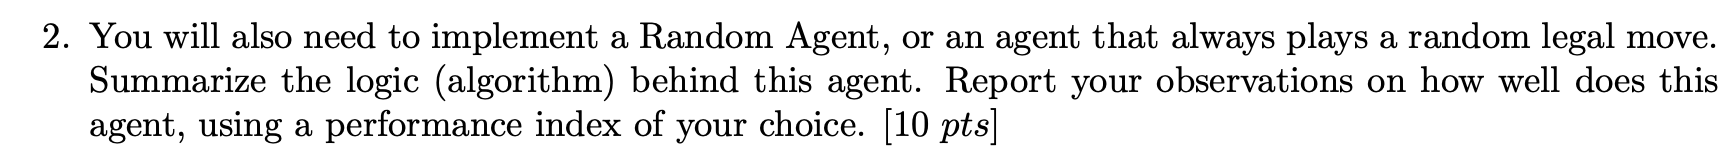

In [190]:
random_agent

<function __main__.random_agent(board, player, *args)>

### 2.2 Random Agent

#### 2.2.1 Logic
- The agent works by selecting a random move from the list of generated moves

### 2.2.2 Perfomance

In [202]:
# Running 5 games and collecting results
total_turns = 0
total_time = 0.0
num_games = 100

for _ in range(num_games):
    initial_board = create_board()
    game_depth = 3
    _, game_stats = play_game(
        initial_board,
        game_depth,
        eval_move_delta,
        random_agent,
        do_nothing_agent,
        verbose=False,
        limit_epochs=False,
    )
    total_turns += game_stats["turns"]
    total_time += game_stats["total_time"]

# Calculating averages
average_turns = total_turns / num_games
average_time = total_time / num_games

# Printing results
print(f"Average number of turns per game: {average_turns:.2f}")
print(f"Average time per game: {average_time:.4f} seconds")


Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Player 1 wins!
Player 2 has no legal moves. Pla

#### 2.2.3 Performance Results
- In terms of turns, the random agent peforms much worst than the minmax agent, taking on average 226 turns to beat the do nothing agent.
- In terms of time, the ramdom agent far out performs the minmax agent and completes games orders of magnitude quicker than the minmax agent.

### 2.3 Sample Output

In [203]:
print("\nminmax vs do_nothing")
initial_board = create_board()
final_board, game_stats = play_game(
    initial_board, 
    game_depth, 
    eval_move_delta, 
    minmax_agent, 
    do_nothing_agent, 
    print_stats=True,
    verbose=True
)


minmax vs do_nothing
Current board state:
Turn 1
[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]
Current board state:
Turn 2
[[  0   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]
 [  7   0   0 -10]]
Current board state:
Turn 3
[[  0   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]
 [  7   0   0 -10]]
Current board state:
Turn 4
[[  0   0   0   4]
 [  1   0   2   0]
 [  2   1   0   0]
 [  0   0   0 -10]]
Current board state:
Turn 5
[[  0   0   0   4]
 [  1   0   2   0]
 [  2   1   0   0]
 [  0   0   0 -10]]
Current board state:
Turn 6
[[  0   0   0   4]
 [  1   0   0   0]
 [  2   1   1   0]
 [  0   0   1 -10]]
Current board state:
Turn 7
[[  0   0   0   4]
 [  1   0   0   0]
 [  2   1   1   0]
 [  0   0   1 -10]]
Current board state:
Turn 8
[[  1   2   1   0]
 [  1   0   0   0]
 [  2   1   1   0]
 [  0   0   1 -10]]
Current board state:
Turn 9
[[  1   2   1   0]
 [  1   0   0   0]
 [  2   1   1   0]
 [  0   0   1 -10]]
Current board state:
Turn 10
[[  

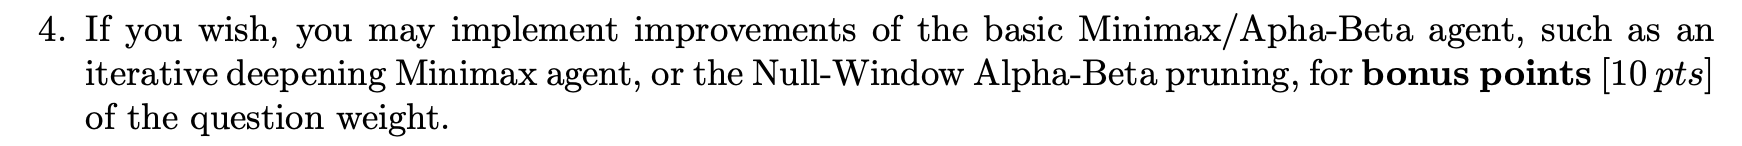

In [212]:
def iterative_deepening_minmax_agent(board, player, max_depth, eval_function, time_limit=None):
    import time
    start_time = time.time()
    best_move = None
    best_value = float('-inf') if player == 1 else float('inf')
    total_nodes_explored = 0

    # Iteratively increase the depth limit
    for depth in range(1, max_depth + 1):
        current_best_value = float('-inf') if player == 1 else float('inf')
        alpha = float('-inf')
        beta = float('inf')
        current_best_move = None
        current_total_nodes = 0

        moves = generate_moves(board, player)
        for move in moves:
            new_board = apply_move(board, move, player)
            move_value, nodes_explored = minmax(new_board, depth, alpha, beta, player == 1, eval_function)
            current_total_nodes += nodes_explored

            if (player == 1 and move_value > current_best_value) or (player == -1 and move_value < current_best_value):
                current_best_value = move_value
                current_best_move = move

            if player == 1:
                alpha = max(alpha, current_best_value)
            else:
                beta = min(beta, current_best_value)

        if time_limit and (time.time() - start_time) >= time_limit:
            break

        # Update the best move found at this depth
        best_value = current_best_value
        best_move = current_best_move
        total_nodes_explored += current_total_nodes

    return apply_move(board, best_move, player), total_nodes_explored

In [221]:
# Testing iterative deepening minimax agent vs. do nothing agent
initial_board = create_board()
game_depth = 3
final_board, game_stats = play_game(
    initial_board,
    game_depth,
    eval_move_delta,
    iterative_deepening_minmax_agent,
    do_nothing_agent,
    print_stats=True,
)
print(final_board)

Player 2 has no legal moves. Player 1 wins!
Depth: 3
Turns: 12
Total time: 6.2833 seconds
Average time per move: 0.5236 seconds
Total nodes explored: 202738
Average nodes per move: 16894.83
[[  0   0   1   0]
 [  1   1   1   0]
 [  2   1   1   1]
 [  0   0   1 -10]]


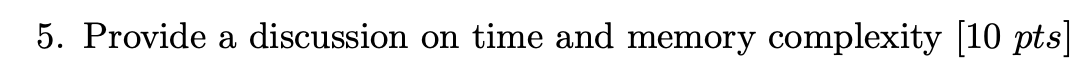

### 2.5 Discussion on Time and Memory Complexity

#### 2.5.1 Time Complexity
- **Basic Minimax Algorithm:**  
  The time complexity of the Minimax algorithm is O(b^d), where:
  - *b* is the branching factor.
  - *d* is the depth of the search tree.  
  This complexity arises because the algorithm explores all possible moves at each depth level, leading to an exponential increase in the number of states evaluated.

- **Minimax with Alpha-Beta Pruning:**  
  - In the best-case scenario (perfect move ordering), the time complexity can be reduced to O(b^{d/2}), allowing the algorithm to search twice as deep with the same computational effort.
  - In the worst-case scenario (poor move ordering), the time complexity remains O(b^d), as pruning has minimal effect.

- **Iterative Deepening:**  
  Although the final time complexity remains O(b^d) for the final depth *d*, the repeated depth-limited searches introduce a small computational overhead.

#### 2.5.2 Memory Complexity
- **Minimax (and Alpha-Beta Pruning):**  
  Since the algorithm employs depth-first search, the memory complexity is O(d), where *d* is the depth of the search tree.

- **Iterative Deepening:**  
  Despite performing multiple depth-limited searches, the memory complexity remains O(d), as each search still uses a depth-first approach.

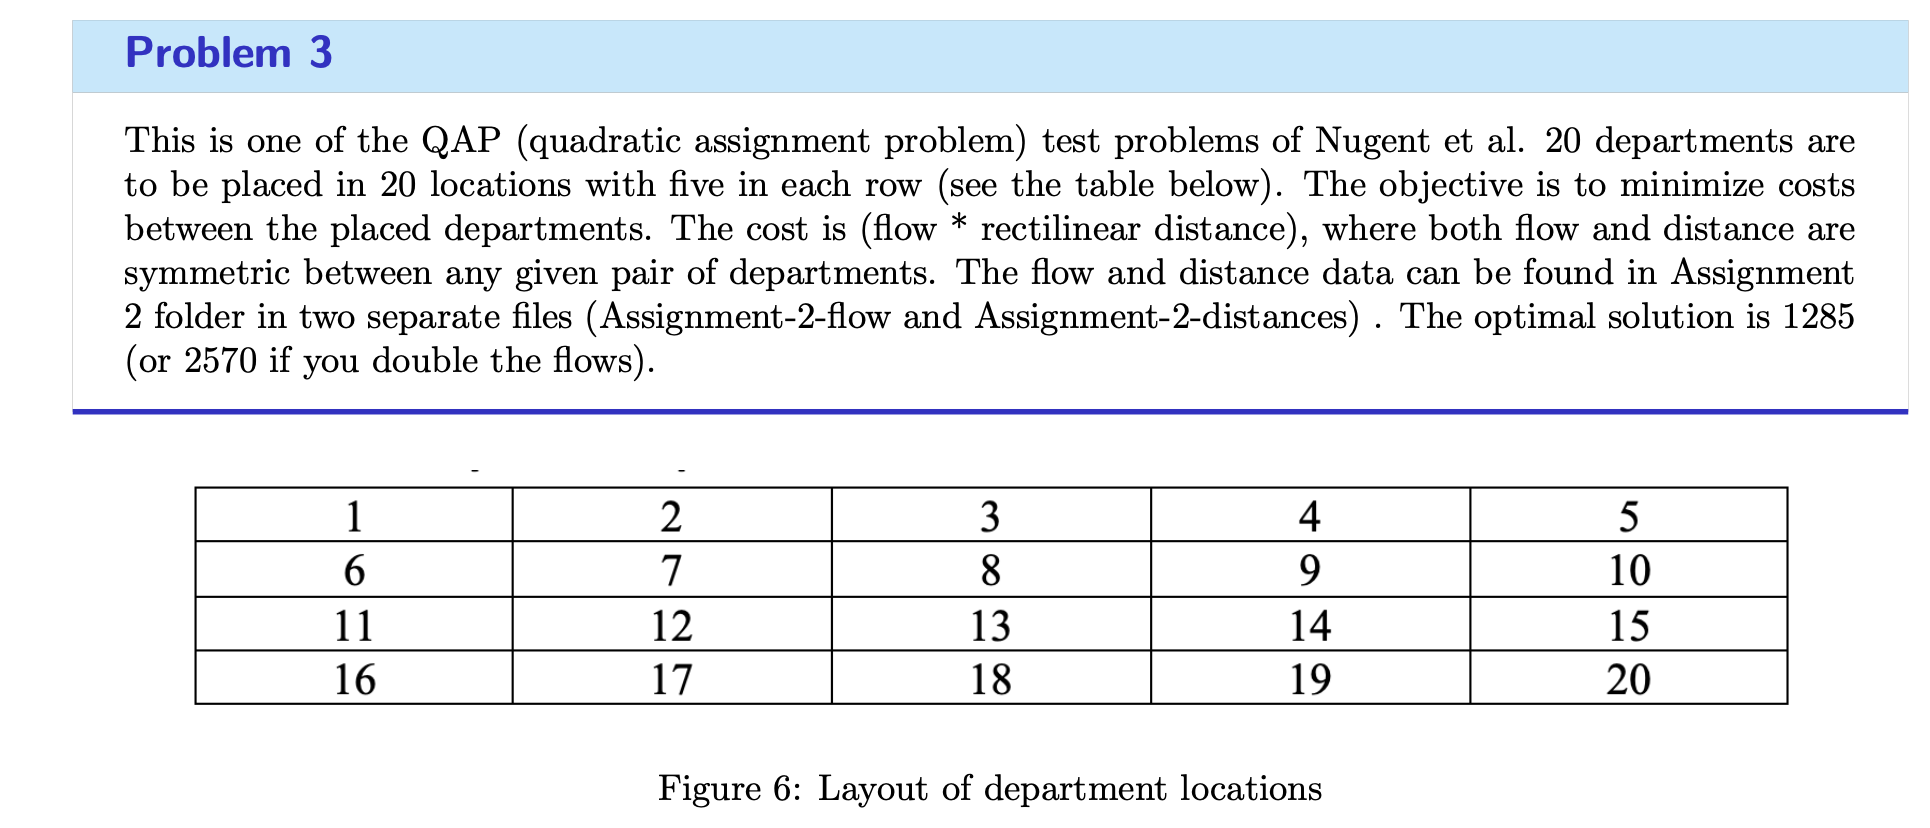

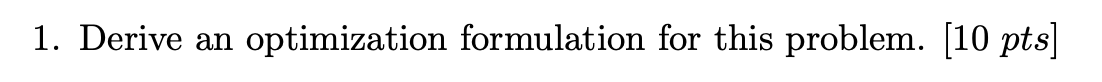

### 3.1 Problem Representation

#### 3.1.1 Objective
- Minimize the total assignment cost for placing 20 departments in 20 locations on a 5x4 grid, where the cost is defined as the product of flow and rectilinear distance between any pair of departments.

#### 3.1.2 Search Space
- The search space consists of all possible permutations of department placements in the 20 available locations.
- Each permutation represents a unique solution, where each department is assigned to a distinct location.

#### 3.1.3 Initial Solution
- An initial solution can be randomly generated by assigning each of the 20 departments to a unique location on the grid.

#### 3.1.4 Neighborhood Definition
- A neighboring solution is defined by swapping the positions of two departments in the current assignment.
- This swap operation creates a new configuration and provides a way to explore the search space.

#### 3.1.5 Move Operator
- The move operator involves selecting two departments and swapping their locations to generate a new neighboring solution.
- This approach allows for systematic exploration of possible assignments.

#### 3.1.6 Cost Function
- The cost function calculates the total assignment cost as the sum of the products of flow and rectilinear distance for all department pairs.

#### 3.1.7 Stopping Criteria
- The algorithm stops when a maximum number of iterations is reached, a time limit is exceeded, or the solution does not improve over a set number of consecutive iterations.

#### 3.1.8 Evaluation and Output
- Output the final assignment configuration, the corresponding total cost, and the number of iterations taken.
- Evaluate the quality of the solution based on the achieved cost compared to known optimal or benchmark solutions.

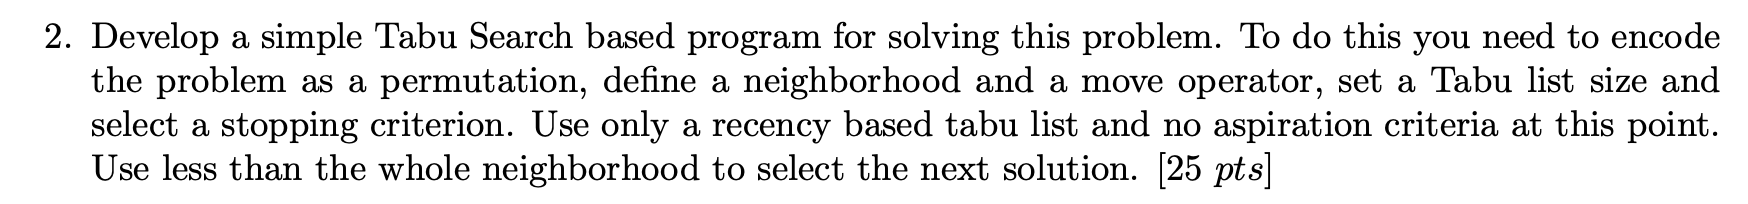

Here is the pseudo code for Problem 3, Question 2 following the style you provided:

### 3.2 Pseudo Code

#### Function Definitions
1. **TabuSearchQAP(flowMatrix, distanceMatrix, initialSolution, tabuListSize, maxIterations):**
    - **Input:**
        - `flowMatrix`: A matrix representing the flow between departments.
        - `distanceMatrix`: A matrix representing the rectilinear distances between locations.
        - `initialSolution`: A permutation representing the initial department assignments.
        - `tabuListSize`: The maximum number of moves to keep in the tabu list.
        - `maxIterations`: The maximum number of iterations for the search.
    - **Output:**
        - The best solution found and its corresponding cost.

    - **Initialize:**
        - `currentSolution = initialSolution`
        - `bestSolution = currentSolution`
        - `currentCost = CalculateCost(currentSolution, flowMatrix, distanceMatrix)`
        - `bestCost = currentCost`
        - `tabuList = empty`
        - `iteration = 0`

2. **CalculateCost(solution, flowMatrix, distanceMatrix):**
    - **Input:**
        - `solution`: A permutation of department assignments.
        - `flowMatrix`: Matrix representing the flow between departments.
        - `distanceMatrix`: Matrix representing the distances between locations.
    - **Output:**
        - The total cost for the given `solution`.

    - **Algorithm:**
        - Initialize `totalCost = 0`
        - For each pair of departments `(i, j)`:
            - `totalCost += flowMatrix[i][j] * distanceMatrix[solution[i]][solution[j]]`
        - Return `totalCost`

3. **GenerateNeighborhood(solution):**
    - **Input:**
        - `solution`: The current permutation of department assignments.
    - **Output:**
        - A list of neighboring solutions, each created by swapping the positions of two departments.

    - **Algorithm:**
        - Initialize `neighbors = empty list`
        - For each pair of departments `(i, j)` where `i ≠ j`:
            - Swap departments `i` and `j` in `solution` to create a new solution `neighbor`
            - Add `neighbor` to `neighbors`
        - Return `neighbors`

#### Main Algorithm

1. **Initialize:**
    - `currentSolution = initialSolution`
    - `bestSolution = initialSolution`
    - `currentCost = CalculateCost(currentSolution, flowMatrix, distanceMatrix)`
    - `bestCost = currentCost`
    - `tabuList = empty`
    - `iteration = 0`

2. **Search Loop:**
    - While `iteration < maxIterations`:
        - `neighbors = GenerateNeighborhood(currentSolution)`
        - Set `bestNeighbor = None`
        - Set `bestNeighborCost = ∞`
        
        - For each `neighbor` in `neighbors`:
            - `neighborCost = CalculateCost(neighbor, flowMatrix, distanceMatrix)`
            - If the move (swap) is not in the `tabuList` or `neighborCost < bestCost`:
                - If `neighborCost < bestNeighborCost`:
                    - `bestNeighbor = neighbor`
                    - `bestNeighborCost = neighborCost`

        - Update `currentSolution = bestNeighbor`
        - Update `currentCost = bestNeighborCost`

        - If `currentCost < bestCost`:
            - Update `bestSolution = currentSolution`
            - Update `bestCost = currentCost`

        - Add the move (swap that led to `currentSolution`) to the `tabuList`
        - If `tabuList` exceeds `tabuListSize`, remove the oldest move from the list

        - Increment `iteration`

3. **End of Search:**
    - Return `bestSolution`, `bestCost`
    
4. **CalculateCost Function Execution:**
    - Given a permutation, calculate the total assignment cost using the flow and distance matrices.

5. **GenerateNeighborhood Function Execution:**
    - Create a set of neighboring solutions by swapping two departments in the current solution.

#### Output
- Return the `bestSolution` found and the corresponding `bestCost`.
- Optionally, display the number of iterations taken and the evolution of the solution over time.
```

In [65]:
def read_matrix_from_csv(file_path):
    return np.loadtxt(file_path, delimiter=',', dtype=int)

In [68]:
# Testing csv reader
distance_path = "/Users/loganhartford/Documents/WaterlooEngineering/4A/ECE 457A/Assignments/ece457a_a2/csv/asignment-2-Distance.csv"
flow_path = "/Users/loganhartford/Documents/WaterlooEngineering/4A/ECE 457A/Assignments/ece457a_a2/csv/assignment-2-Flow.csv"

distance_matrix = read_matrix_from_csv(distance_path)
flow_matrix = read_matrix_from_csv(flow_path)

print("Distance Matrix:")
print(distance_matrix)

print("\nFlow Matrix:")
print(flow_matrix)

distance_matrix.shape, flow_matrix.shape

Distance Matrix:
[[0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7]
 [1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5 6]
 [2 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5]
 [3 2 1 0 1 4 3 2 1 2 5 4 3 2 3 6 5 4 3 4]
 [4 3 2 1 0 5 4 3 2 1 6 5 4 3 2 7 6 5 4 3]
 [1 2 3 4 5 0 1 2 3 4 1 2 3 4 5 2 3 4 5 6]
 [2 1 2 3 4 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5]
 [3 2 1 2 3 2 1 0 1 2 3 2 1 2 3 4 3 2 3 4]
 [4 3 2 1 2 3 2 1 0 1 4 3 2 1 2 5 4 3 2 3]
 [5 4 3 2 1 4 3 2 1 0 5 4 3 2 1 6 5 4 3 2]
 [2 3 4 5 6 1 2 3 4 5 0 1 2 3 4 1 2 3 4 5]
 [3 2 3 4 5 2 1 2 3 4 1 0 1 2 3 2 1 2 3 4]
 [4 3 2 3 4 3 2 1 2 3 2 1 0 1 2 3 2 1 2 3]
 [5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 4 3 2 1 2]
 [6 5 4 3 2 5 4 3 2 1 4 3 2 1 0 5 4 3 2 1]
 [3 4 5 6 7 2 3 4 5 6 1 2 3 4 5 0 1 2 3 4]
 [4 3 4 5 6 3 2 3 4 5 2 1 2 3 4 1 0 1 2 3]
 [5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 2]
 [6 5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1]
 [7 6 5 4 3 6 5 4 3 2 5 4 3 2 1 4 3 2 1 0]]

Flow Matrix:
[[ 0  0  5  0  5  2 10  3  1  5  5  5  0  0  5  4  4  0  0  1]
 [ 0  0  3 10  5  1  5  1  2  4  2  5  0 10 1

((20, 20), (20, 20))

In [72]:
def generate_random_permutation(num_departments):
    permutation = np.random.permutation(num_departments)
    return permutation


In [73]:
# Testing generate_random_permutation function
initial_permutation = generate_random_permutation(20)
print("Initial Random Permutation:", initial_permutation)
print(len(initial_permutation))

Initial Random Permutation: [ 7  0 13  9 19  4  3 10 11  2 18 17 12 16  8  1  6  5 15 14]
20


In [74]:
def generate_neighborhood(permutation):
    neighborhood = []
    num_departments = len(permutation)
    
    for i in range(num_departments):
        # Don't look at the lower triangle
        for j in range(i + 1, num_departments):
            # Create a new permutation by swapping elements at i and j
            new_permutation = permutation.copy()
            new_permutation[i], new_permutation[j] = new_permutation[j], new_permutation[i]
            neighborhood.append(new_permutation)
    
    return np.array(neighborhood)

In [75]:
# Testing generate_neighborhood function
current_permutation = generate_random_permutation(20)
neighborhood = generate_neighborhood(current_permutation)

print("Current Permutation:", current_permutation)
print("Generated Neighborhood:")
print(neighborhood)
neighborhood.shape

Current Permutation: [ 4 10 12  8 11  9 13 18  6  0 16 15  3  7 17  1 19  5  2 14]
Generated Neighborhood:
[[10  4 12 ...  5  2 14]
 [12 10  4 ...  5  2 14]
 [ 8 10 12 ...  5  2 14]
 ...
 [ 4 10 12 ...  2  5 14]
 [ 4 10 12 ... 14  2  5]
 [ 4 10 12 ...  5 14  2]]


(190, 20)

In [88]:
def calculate_cost(solution, flow_matrix, distance_matrix):
    total_cost = 0
    num_departments = len(solution)
    
    for i in range(num_departments):
        for j in range(i + 1, num_departments):  # Start from i + 1 to avoid the diagonal and lower triangle
            department_i = solution[i]
            department_j = solution[j]
            total_cost += flow_matrix[department_i][department_j] * distance_matrix[i][j]
    
    return total_cost

In [315]:
# Testing calculate_cost function
solution = np.array([0, 2, 5])
cost = calculate_cost(solution, flow_matrix, distance_matrix)
print("Total Cost:", cost)

Total Cost: 14


In [136]:
from collections import deque, defaultdict
import numpy as np

def tabu_search_qap(flow_matrix, distance_matrix, initial_solution, tabu_list_size, max_iterations, 
                    dynamic_tabu=False, tabu_list_size_range=(5, 20), change_interval=50, 
                    aspiration=False, use_frequency_based=False, frequency_penalty_factor=1.0):
    current_solution = initial_solution.copy()
    best_solution = current_solution.copy()
    current_cost = calculate_cost(current_solution, flow_matrix, distance_matrix)
    best_cost = current_cost
    iteration = 0

    # Initialize the tabu list and frequency dictionary
    current_tabu_list_size = tabu_list_size
    tabu_list = deque(maxlen=current_tabu_list_size)
    frequency_dict = defaultdict(int)  # Tracks how often swaps are used

    while iteration < max_iterations:
        # Update the tabu list size if using dynamic tabu
        if dynamic_tabu and iteration % change_interval == 0:
            current_tabu_list_size = np.random.randint(*tabu_list_size_range)
            tabu_list = deque(tabu_list, maxlen=current_tabu_list_size)

        # Generate the neighborhood of the current solution
        neighborhood = generate_neighborhood(current_solution)
        best_neighbor = None
        best_neighbor_cost = float('inf')

        # Evaluate a subset of neighbors
        num_samples = min(len(neighborhood), current_tabu_list_size * 2)
        random_indices = np.random.choice(len(neighborhood), num_samples, replace=False)
        random_neighbors = neighborhood[random_indices]

        for neighbor in random_neighbors:
            # Find the swap that led to this neighbor
            swap = find_swap(current_solution, neighbor)

            # Calculate the cost of the neighbor, applying a frequency-based penalty if enabled
            neighbor_cost = calculate_cost(neighbor, flow_matrix, distance_matrix)
            if use_frequency_based:
                frequency_penalty = frequency_dict[swap] * frequency_penalty_factor
                neighbor_cost += frequency_penalty

            # Check if the move is tabu or satisfies the aspiration criteria
            if swap not in tabu_list or (aspiration and neighbor_cost < best_cost):
                if neighbor_cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = neighbor_cost

        # Update current solution to the best found neighbor
        if best_neighbor is not None:
            current_solution = best_neighbor
            current_cost = best_neighbor_cost

            # Update the best solution if the current one is better
            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

            # Update the Tabu list and frequency dictionary with the new swap
            swap = find_swap(initial_solution, current_solution)
            tabu_list.append(swap)
            frequency_dict[swap] += 1  # Increase the frequency count for the swap

        iteration += 1

    return best_solution, best_cost

def find_swap(solution1, solution2):
    for i in range(len(solution1)):
        if solution1[i] != solution2[i]:
            j = np.where(solution2 == solution1[i])[0][0]
            return (i, j)
    return None


In [137]:
# Testing tabu_search_qap function
initial_solution = generate_random_permutation(20)
tabu_list_size = 10
max_iterations = 500
print("Initial Solution:", initial_solution)
print("Initial Cost:", calculate_cost(initial_solution, flow_matrix, distance_matrix))

best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, tabu_list_size, max_iterations)

print("Best Solution Found:", best_solution)
print("Best Cost:", best_cost)


Initial Solution: [ 0  7  3 16 15 13  1  4  8 10  9 14 18  6 19 11  5 12 17  2]
Initial Cost: 1634
Best Solution Found: [12  0  6  4 16  5 10 19  7  3  2  9 11 14 18  8 15 13  1 17]
Best Cost: 1298


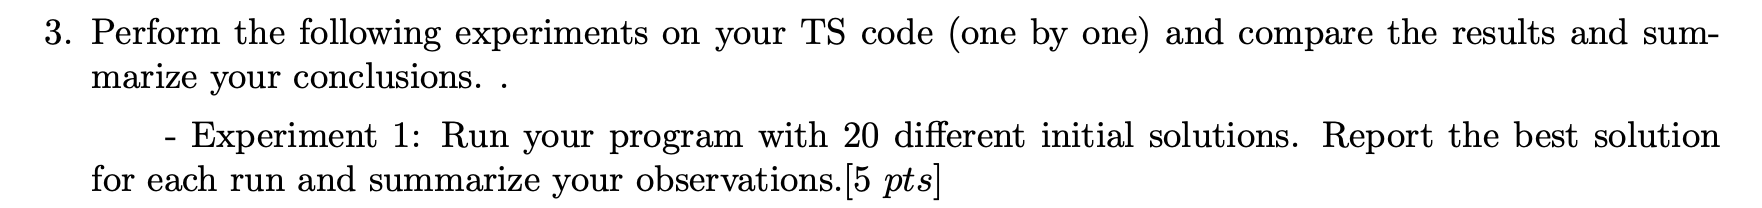

In [114]:
import time

tabu_list_size = 10
max_iterations = 500
results = []

print("Running Tabu Search with 20 different initial solutions")
for i in range(20):
    initial_solution = generate_random_permutation(20)
    initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)

    start_time = time.time()
    best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, 
                                               tabu_list_size=tabu_list_size, 
                                               max_iterations=max_iterations)
    end_time = time.time()
    execution_time = end_time - start_time

    results.append((initial_cost, best_cost, execution_time))
    print(f"{i}: Initial cost: {initial_cost}, Best cost: {best_cost}, Execution time: {execution_time:.4f} seconds")

print("\nSummary of Results:")
initial_costs = [run[0] for run in results]
final_costs = [run[1] for run in results]
execution_times = [run[2] for run in results]

avg_initial_cost = sum(initial_costs) / len(initial_costs)
avg_final_cost = sum(final_costs) / len(final_costs)
avg_execution_time = sum(execution_times) / len(execution_times)

print(f"Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")


Running Tabu Search with 20 different initial solutions
0: Initial cost: 1780, Best cost: 1323, Execution time: 0.8553 seconds
1: Initial cost: 1629, Best cost: 1316, Execution time: 0.8532 seconds
2: Initial cost: 1670, Best cost: 1311, Execution time: 0.8457 seconds
3: Initial cost: 1726, Best cost: 1305, Execution time: 0.8411 seconds
4: Initial cost: 1736, Best cost: 1311, Execution time: 0.8416 seconds
5: Initial cost: 1677, Best cost: 1304, Execution time: 0.8445 seconds
6: Initial cost: 1722, Best cost: 1308, Execution time: 0.8337 seconds
7: Initial cost: 1651, Best cost: 1305, Execution time: 0.8495 seconds
8: Initial cost: 1656, Best cost: 1314, Execution time: 0.8431 seconds
9: Initial cost: 1791, Best cost: 1306, Execution time: 0.8342 seconds
10: Initial cost: 1648, Best cost: 1318, Execution time: 0.8289 seconds
11: Initial cost: 1598, Best cost: 1309, Execution time: 0.8300 seconds
12: Initial cost: 1637, Best cost: 1325, Execution time: 0.8354 seconds
13: Initial cost: 

#### 3.3.1 Summary of Observations

**Initial and Final Costs:**
- The initial costs for the 20 different runs ranged between 1607 and 1780.
- The final costs after running the Tabu Search ranged between 1290 and 1327, indicating that the algorithm consistently found better solutions regardless of the starting point.

**Improvement Across Runs:**
- The best improvements were observed in runs with relatively higher initial costs, demonstrating that the Tabu Search algorithm effectively optimized even poorer starting solutions.
- There was a range of improvements, with some runs showing a reduction of over 400 in the cost, while others showed smaller gains.

These observations indicate that the Tabu Search algorithm's performance is not highly dependent on the quality of the starting point.


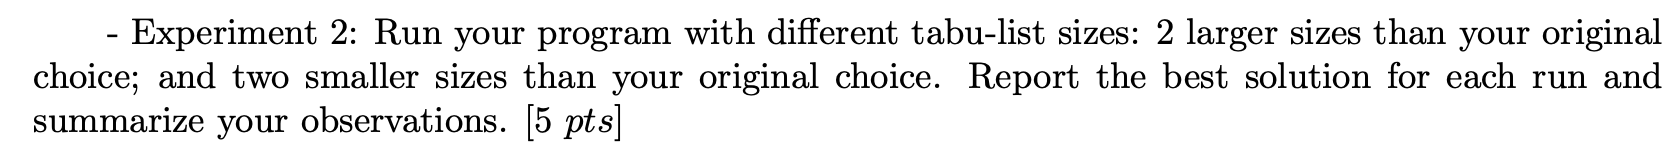

In [111]:
# Parameters for the experiment
original_tabu_list_size = 10
tabu_list_sizes = [5, 7, 10, 15, 20]
max_iterations = 500

# Dictionary to store results for each tabu-list size
results = {size: [] for size in tabu_list_sizes}

# Run the experiment for each tabu-list size
for size in tabu_list_sizes:
    print(f"Running Tabu Search with tabu-list size: {size}")
    for i in range(10):
        initial_solution = generate_random_permutation(20)
        initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)
        
        start_time = time.time()
        best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, size, max_iterations)
        end_time = time.time()
        execution_time = end_time - start_time
    
        results[size].append((initial_cost, best_cost, execution_time))

# Summary of the results
print("\nSummary of Results:")
for size, runs in results.items():
    initial_costs = [run[0] for run in runs]
    final_costs = [run[1] for run in runs]
    execution_times = [run[2] for run in runs]
    
    avg_initial_cost = sum(initial_costs) / len(initial_costs)
    avg_final_cost = sum(final_costs) / len(final_costs)
    avg_execution_time = sum(execution_times) / len(execution_times)
    
    print(f"Tabu List Size {size}: Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")


Running Tabu Search with tabu-list size: 5
Running Tabu Search with tabu-list size: 7
Running Tabu Search with tabu-list size: 10
Running Tabu Search with tabu-list size: 15
Running Tabu Search with tabu-list size: 20

Summary of Results:
Tabu List Size 5: Avg Initial Cost = 1683.80, Avg Final Cost = 1330.00, Avg Execution Time = 0.4644 seconds
Tabu List Size 7: Avg Initial Cost = 1701.60, Avg Final Cost = 1324.40, Avg Execution Time = 0.6150 seconds
Tabu List Size 10: Avg Initial Cost = 1737.90, Avg Final Cost = 1308.80, Avg Execution Time = 0.8465 seconds
Tabu List Size 15: Avg Initial Cost = 1693.40, Avg Final Cost = 1302.60, Avg Execution Time = 1.2224 seconds
Tabu List Size 20: Avg Initial Cost = 1706.30, Avg Final Cost = 1298.30, Avg Execution Time = 1.6060 seconds


#### 3.3.2 Summary of Observations:

**Solution Quality:**
- **Smaller Tabu List Sizes (5 and 7):**
    - The average final costs for tabu list sizes of 5 and 7 were 1330.00 and 1324.40, respectively.
    - These values indicate a higher final cost compared to larger tabu list sizes, suggesting that the smaller tabu lists may have caused the search to get stuck in local optima more frequently, due to insufficient memory for avoiding repeated moves.
- **Larger Tabu List Sizes (15 and 20):**
    - The average final costs for tabu list sizes of 15 and 20 were 1302.60 and 1298.30, respectively.
    - This improvement in final costs indicates that the larger tabu lists helped avoid more local optima, allowing the algorithm to explore a broader range of solutions and ultimately find better results.

**Execution Time:**
- As the tabu list size increased, the average execution time also increased.
    - Tabu list size 5: **0.4644 seconds**
    - Tabu list size 7: **0.6150 seconds**
    - Tabu list size 10: **0.8465 seconds**
    - Tabu list size 15: **1.2224 seconds**
    - Tabu list size 20: **1.6060 seconds**
- The increase in execution time is expected because larger tabu lists involve more checks to ensure that recent moves are not revisited, which adds to the computational overhead.

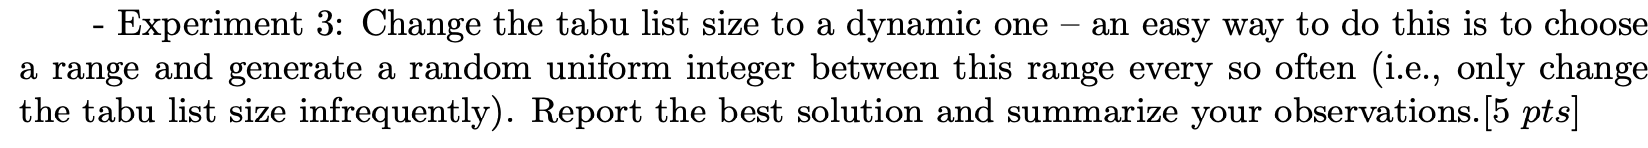

In [134]:
tabu_list_size_range = (5, 20)
change_interval = 50
max_iterations = 500
results = []

print("Running Tabu Search with dynamic tabu list size")
for i in range(20):
    initial_solution = generate_random_permutation(20)
    initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)

    start_time = time.time()
    best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, 
                                               tabu_list_size=10,  # Initial size, but will be dynamic
                                               max_iterations=max_iterations, 
                                               dynamic_tabu=True, 
                                               tabu_list_size_range=tabu_list_size_range, 
                                               change_interval=change_interval)
    end_time = time.time()
    execution_time = end_time - start_time

    results.append((initial_cost, best_cost, execution_time))
    print(f"Dynamic - Run {i}: Initial cost: {initial_cost}, Best cost: {best_cost}, Execution time: {execution_time:.4f} seconds")


print("\nSummary of Results:")
initial_costs = [run[0] for run in results]
final_costs = [run[1] for run in results]
execution_times = [run[2] for run in results]

avg_initial_cost = sum(initial_costs) / len(initial_costs)
avg_final_cost = sum(final_costs) / len(final_costs)
avg_execution_time = sum(execution_times) / len(execution_times)

print(f"Dynamic Tabu Size: Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")


Running Tabu Search with dynamic tabu list size
Dynamic - Run 0: Initial cost: 1777, Best cost: 1297, Execution time: 1.0385 seconds
Dynamic - Run 1: Initial cost: 1598, Best cost: 1304, Execution time: 1.0072 seconds
Dynamic - Run 2: Initial cost: 1758, Best cost: 1311, Execution time: 1.1747 seconds
Dynamic - Run 3: Initial cost: 1633, Best cost: 1293, Execution time: 1.2758 seconds
Dynamic - Run 4: Initial cost: 1688, Best cost: 1305, Execution time: 1.2202 seconds
Dynamic - Run 5: Initial cost: 1728, Best cost: 1302, Execution time: 1.1543 seconds
Dynamic - Run 6: Initial cost: 1739, Best cost: 1295, Execution time: 1.1320 seconds
Dynamic - Run 7: Initial cost: 1669, Best cost: 1305, Execution time: 1.0918 seconds
Dynamic - Run 8: Initial cost: 1818, Best cost: 1300, Execution time: 1.1822 seconds
Dynamic - Run 9: Initial cost: 1707, Best cost: 1310, Execution time: 1.0487 seconds
Dynamic - Run 10: Initial cost: 1681, Best cost: 1290, Execution time: 1.0338 seconds
Dynamic - Run 11

**Experiment 1 Results for Ref**

Summary of Results:

Avg Initial Cost = 1692.70, Avg Final Cost = 1312.95, Avg Execution Time = 0.8391 seconds

#### 3.3.3 Summary of Observations

**Dynamic Tabu List Size:**
- **Average Initial Cost:** 1711.70
- **Average Final Cost:** 1303.45
- **Average Execution Time:** 1.0906 seconds

**Static Tabu List (Experiment 1) for Reference:**
- **Average Initial Cost:** 1692.70
- **Average Final Cost:** 1312.95
- **Average Execution Time:** 0.8391 seconds

**Solution Quality:**
- The dynamic tabu list configuration achieved a significantly better average final cost (1303.45) compared to the static approach (1312.95).
- This suggests that dynamically adjusting the tabu list size helped the algorithm explore the search space more effectively and escape local optima.

**Execution Time:**
- The dynamic tabu list configuration took longer on average (1.0906 seconds vs. 0.8391 seconds).
- The increased execution time is expected due to the overhead associated with adjusting the tabu list size periodically and evaluating a larger number of neighbors during some iterations.

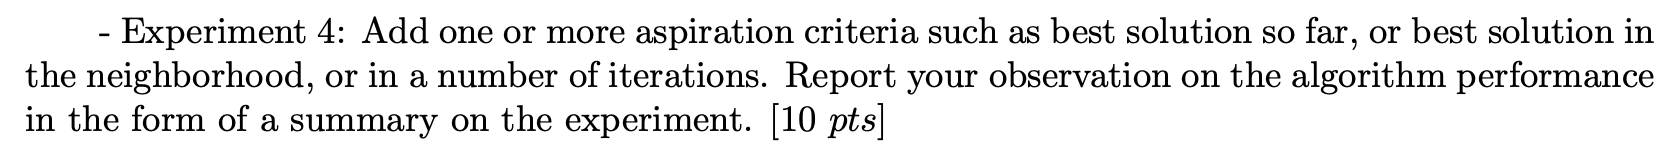

In [123]:
tabu_list_size = 10
max_iterations = 500
results = []

print("Running Tabu Search with 20 different initial solutions (with aspiration)")
for i in range(20):
    initial_solution = generate_random_permutation(20)
    initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)

    start_time = time.time()
    best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, 
                                               tabu_list_size=tabu_list_size, 
                                               max_iterations=max_iterations,
                                               aspiration=True)
    end_time = time.time()
    execution_time = end_time - start_time

    results.append((initial_cost, best_cost, execution_time))
    print(f"{i}: Initial cost: {initial_cost}, Best cost: {best_cost}, Execution time: {execution_time:.4f} seconds")

print("\nSummary of Results:")
initial_costs = [run[0] for run in results]
final_costs = [run[1] for run in results]
execution_times = [run[2] for run in results]

avg_initial_cost = sum(initial_costs) / len(initial_costs)
avg_final_cost = sum(final_costs) / len(final_costs)
avg_execution_time = sum(execution_times) / len(execution_times)

print(f"Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")

Running Tabu Search with 20 different initial solutions (with aspiration)
0: Initial cost: 1619, Best cost: 1295, Execution time: 0.8603 seconds
1: Initial cost: 1734, Best cost: 1319, Execution time: 0.8569 seconds
2: Initial cost: 1634, Best cost: 1317, Execution time: 0.8441 seconds
3: Initial cost: 1706, Best cost: 1313, Execution time: 0.8268 seconds
4: Initial cost: 1707, Best cost: 1301, Execution time: 0.8345 seconds
5: Initial cost: 1689, Best cost: 1303, Execution time: 0.8456 seconds
6: Initial cost: 1780, Best cost: 1315, Execution time: 0.8459 seconds
7: Initial cost: 1704, Best cost: 1312, Execution time: 0.8450 seconds
8: Initial cost: 1826, Best cost: 1296, Execution time: 0.8562 seconds
9: Initial cost: 1732, Best cost: 1326, Execution time: 0.8401 seconds
10: Initial cost: 1748, Best cost: 1312, Execution time: 0.8474 seconds
11: Initial cost: 1722, Best cost: 1309, Execution time: 0.8687 seconds
12: Initial cost: 1719, Best cost: 1308, Execution time: 0.8617 seconds


**Experiment 1 Results for Ref**

Summary of Results:

Avg Initial Cost = 1692.70, Avg Final Cost = 1312.95, Avg Execution Time = 0.8391 seconds

#### 3.3.4 Summary of Results

**Static Tabu List Size (Experiment 1):**
- **Average Initial Cost:** 1692.70  
- **Average Final Cost:** 1312.95  
- **Average Execution Time:** 0.8391 seconds  

**Aspiration Criterion (Experiment 4):**
- **Average Initial Cost:** 1702.05  
- **Average Final Cost:** 1310.40  
- **Average Execution Time:** 0.8665 seconds  

**Solution Quality:**
- The aspiration criterion achieved a slightly lower average final cost (1310.40) compared to the static tabu list configuration (1312.95), indicating an improvement in escaping local optima and finding better solutions.

**Execution Time**:
- The average execution time with aspiration was slightly higher (0.8665 seconds vs. 0.8391 seconds), suggesting a minor overhead due to the additional checks for the aspiration condition. However, the increase was modest, indicating that the added complexity did not significantly impact performance.

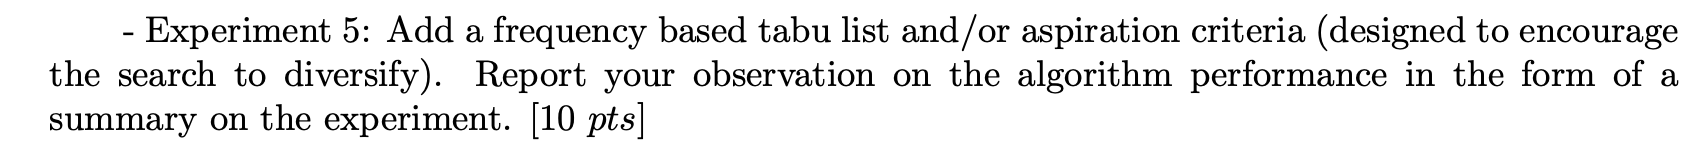

In [133]:
# Parameters for the experiment
tabu_list_size = 10
max_iterations = 500
frequency_penalty_factors = [0.1, 0.5, 1.0, 2.0, 5.0]  # Different penalty factors to test
all_results = {factor: [] for factor in frequency_penalty_factors}  # Store results for each factor

print("Running Tabu Search with frequency-based tabu list and aspiration")
for penalty_factor in frequency_penalty_factors:
    print(f"\nTesting with Frequency Penalty Factor: {penalty_factor}")
    for i in range(20):
        initial_solution = generate_random_permutation(20)
        initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)

        start_time = time.time()
        best_solution, best_cost = tabu_search_qap(
            flow_matrix, distance_matrix, initial_solution, 
            tabu_list_size=tabu_list_size, max_iterations=max_iterations, 
            aspiration=True, use_frequency_based=True, 
            frequency_penalty_factor=penalty_factor
        )
        end_time = time.time()
        execution_time = end_time - start_time

        all_results[penalty_factor].append((initial_cost, best_cost, execution_time))

print("\nSummary of Results for Different Frequency Penalty Factors:")
for penalty_factor, results in all_results.items():
    initial_costs = [run[0] for run in results]
    final_costs = [run[1] for run in results]
    execution_times = [run[2] for run in results]

    avg_initial_cost = sum(initial_costs) / len(initial_costs)
    avg_final_cost = sum(final_costs) / len(final_costs)
    avg_execution_time = sum(execution_times) / len(execution_times)

    print(f"\nFrequency Penalty Factor {penalty_factor}:")
    print(f"Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")


Running Tabu Search with frequency-based tabu list and aspiration

Testing with Frequency Penalty Factor: 0.1

Testing with Frequency Penalty Factor: 0.5

Testing with Frequency Penalty Factor: 1.0

Testing with Frequency Penalty Factor: 2.0

Testing with Frequency Penalty Factor: 5.0

Summary of Results for Different Frequency Penalty Factors:

Frequency Penalty Factor 0.1:
Avg Initial Cost = 1722.30, Avg Final Cost = 1309.00, Avg Execution Time = 0.8555 seconds

Frequency Penalty Factor 0.5:
Avg Initial Cost = 1702.30, Avg Final Cost = 1311.75, Avg Execution Time = 0.8426 seconds

Frequency Penalty Factor 1.0:
Avg Initial Cost = 1706.05, Avg Final Cost = 1313.35, Avg Execution Time = 0.8408 seconds

Frequency Penalty Factor 2.0:
Avg Initial Cost = 1690.30, Avg Final Cost = 1312.70, Avg Execution Time = 0.8407 seconds

Frequency Penalty Factor 5.0:
Avg Initial Cost = 1697.00, Avg Final Cost = 1311.35, Avg Execution Time = 0.8498 seconds


#### Comparison of Results: Frequency-Based vs. Static Tabu List

1. **Static Tabu List (Experiment 1):**
   - **Average Initial Cost:** 1692.70
   - **Average Final Cost:** 1312.95
   - **Average Execution Time:** 0.8391 seconds

2. **Frequency Penalty Factor 0.1:**
   - **Average Initial Cost:** 1722.30
   - **Average Final Cost:** 1309.00
   - **Average Execution Time:** 0.8555 seconds

3. **Frequency Penalty Factor 0.5:**
   - **Average Initial Cost:** 1702.30
   - **Average Final Cost:** 1311.75
   - **Average Execution Time:** 0.8426 seconds

4. **Frequency Penalty Factor 1.0:**
   - **Average Initial Cost:** 1706.05
   - **Average Final Cost:** 1313.35
   - **Average Execution Time:** 0.8408 seconds

5. **Frequency Penalty Factor 2.0:**
   - **Average Initial Cost:** 1690.30
   - **Average Final Cost:** 1312.70
   - **Average Execution Time:** 0.8407 seconds

6. **Frequency Penalty Factor 5.0:**
   - **Average Initial Cost:** 1697.00
   - **Average Final Cost:** 1311.35
   - **Average Execution Time:** 0.8498 seconds

**Solution Quality:**
- The **frequency penalty factor of 0.1** achieved the best average final cost (1309.00), which is slightly better than the static approach (1312.95). This suggests that a small penalty encourages better diversification, leading to improved solution quality.
- Other frequency penalty factors (0.5, 1.0, 2.0, and 5.0) had final costs close to the static results (around 1311-1313), indicating that higher penalties may not significantly enhance solution quality compared to the static approach.

**Execution Time:**
- Execution times were slightly higher for frequency-based tabu list configurations (around 0.84-0.86 seconds) compared to the static approach (0.8391 seconds). The increase in time is marginal, suggesting that the added complexity of frequency-based penalties does not substantially impact performance.

In [135]:
# Experiment 6 (Everything)
tabu_list_size = 10
max_iterations = 500
results = []

print("Running Tabu Search with 20 different initial solutions (with all mods)")
for i in range(20):
    initial_solution = generate_random_permutation(20)
    initial_cost = calculate_cost(initial_solution, flow_matrix, distance_matrix)

    start_time = time.time()
    best_solution, best_cost = tabu_search_qap(flow_matrix, distance_matrix, initial_solution, 
                                               tabu_list_size=tabu_list_size, 
                                               max_iterations=max_iterations,
                                               aspiration=True,
                                               use_frequency_based=True,
                                               frequency_penalty_factor=0.1,
                                               dynamic_tabu=True,)
    end_time = time.time()
    execution_time = end_time - start_time

    results.append((initial_cost, best_cost, execution_time))
    print(f"{i}: Initial cost: {initial_cost}, Best cost: {best_cost}, Execution time: {execution_time:.4f} seconds")

print("\nSummary of Results:")
initial_costs = [run[0] for run in results]
final_costs = [run[1] for run in results]
execution_times = [run[2] for run in results]

avg_initial_cost = sum(initial_costs) / len(initial_costs)
avg_final_cost = sum(final_costs) / len(final_costs)
avg_execution_time = sum(execution_times) / len(execution_times)

print(f"Avg Initial Cost = {avg_initial_cost:.2f}, Avg Final Cost = {avg_final_cost:.2f}, Avg Execution Time = {avg_execution_time:.4f} seconds")

Running Tabu Search with 20 different initial solutions (with all mods)
0: Initial cost: 1608, Best cost: 1306.0, Execution time: 1.1826 seconds
1: Initial cost: 1795, Best cost: 1285.0, Execution time: 1.2464 seconds
2: Initial cost: 1710, Best cost: 1325.0, Execution time: 1.0332 seconds
3: Initial cost: 1786, Best cost: 1301.0, Execution time: 0.9607 seconds
4: Initial cost: 1585, Best cost: 1297.0, Execution time: 0.9698 seconds
5: Initial cost: 1605, Best cost: 1316.0, Execution time: 1.2005 seconds
6: Initial cost: 1734, Best cost: 1303.0, Execution time: 0.9934 seconds
7: Initial cost: 1605, Best cost: 1301.0, Execution time: 0.9738 seconds
8: Initial cost: 1654, Best cost: 1305.0, Execution time: 1.0244 seconds
9: Initial cost: 1789, Best cost: 1302.0, Execution time: 1.0461 seconds
10: Initial cost: 1730, Best cost: 1317.0, Execution time: 0.8196 seconds
11: Initial cost: 1683, Best cost: 1311.0, Execution time: 1.0565 seconds
12: Initial cost: 1668, Best cost: 1292.0, Executi

#### 3.3.6 Summary of Results for Experiment 6

**Experiment 6 (All Mods):**
- **Average Initial Cost:** 1688.75
- **Average Final Cost:** 1303.75
- **Average Execution Time:** 1.0615 seconds

**Comparison to Other Experiments:**
- **Static Tabu List (Experiment 1):**
    - **Average Initial Cost:** 1692.70
    - **Average Final Cost:** 1312.95
    - **Average Execution Time:** 0.8391 seconds
- **Dynamic Tabu List Size (Experiment 3):**
    - **Average Initial Cost:** 1711.70
    - **Average Final Cost:** 1303.45
    - **Average Execution Time:** 1.0906 seconds
- **Best Frequency Penalty Factor (Experiment 5, 0.1):**
    - **Average Initial Cost:** 1722.30
    - **Average Final Cost:** 1309.00
    - **Average Execution Time:** 0.8555 seconds

**Solution Quality:** 
- The final cost for Experiment 6 (1303.75) is very close to the best performance observed in Experiment 3 (1303.45), indicating that combining multiple modifications helped the algorithm achieve a near-optimal solution.

**Execution Time:** 
- The execution time (1.0615 seconds) is slightly lower than the dynamic configuration alone (1.0906 seconds) but higher than the static approach (0.8391 seconds).

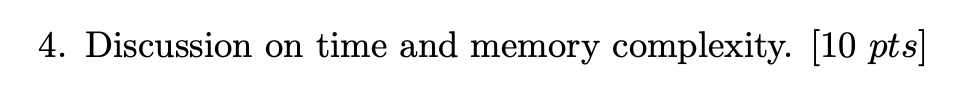

### 3.4 Discussion on Time and Memory Complexity:

#### 3.4.1 Time Complexity
- The time complexity of the Tabu Search algorithm primarily depends on the number of iterations (`max_iterations`) and the size of the neighborhood considered in each iteration.
- **Neighborhood Generation:** Generating the neighborhood involves evaluating swaps between pairs of elements in the solution. For a problem with `n` elements, there are O(n^2) possible swaps. Evaluating the entire neighborhood would therefore have a time complexity of O(n^2) per iteration.
- **Dynamic Tabu List:** If the tabu list size is updated dynamically, the cost of resizing the tabu list can be considered constant, O(1), since only the length of the list changes.
- **Aspiration Criterion and Frequency Penalty:** Checking whether a solution satisfies the aspiration criteria or applying a frequency-based penalty are constant-time operations, O(1).
- **Overall Time Complexity:** Given the number of iterations, the overall time complexity can be approximated as O(max_iterations * n^2). When using a dynamic or frequency-based tabu list, this complexity remains similar because the overhead for updating these lists is minimal.

#### 3.4.2 Memory Complexity
- **Tabu List:** The memory complexity for storing the tabu list is O(tabulistsize). In the case of a dynamic tabu list, this may vary, but in general, it remains a small constant relative to the problem size.
- **Frequency Dictionary:** If frequency-based penalties are used, the memory required is O(n^2), as it tracks the frequency of each swap in the neighborhood.
- **Neighborhood Storage:** The space needed to store the neighborhood is O(n^2), as all possible pairs of swaps need to be evaluated.
- **Best Solution Tracking:** Storing the current best solution requires  O(n)  memory, as the solution vector has length  n .

## Problem 4
* I am not attempting problem 4 as I have completed this assignment alone.